# Phân tích dữ liệu Healthcare - Dự đoán đột quỵ

## Mục tiêu
Phân tích dữ liệu về các yếu tố nguy cơ gây đột quỵ và tìm hiểu mối quan hệ giữa các biến với khả năng bị đột quỵ.

## Cấu trúc phân tích
1. Tổng quan về dữ liệu
2. Xử lý dữ liệu ban đầu
3. Phân tích đơn biến
4. Phân tích hai biến
5. Phân tích đa biến
6. Kiểm định thống kê
7. Trực quan hóa nâng cao
8. Kết luận và insights

## 1. Import thư viện và cấu hình

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Thư viện cho kiểm định thống kê
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Cấu hình pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Cấu hình matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("Đã import thành công tất cả thư viện cần thiết!")

Đã import thành công tất cả thư viện cần thiết!


## 2. Tổng quan về dữ liệu

In [2]:
# Load dữ liệu
df = pd.read_csv('healthcare-dataset-stroke-data.csv.xls')

print("=== THÔNG TIN CƠ BẢN VỀ DỮ LIỆU ===")
print(f"Kích thước dữ liệu: {df.shape[0]} dòng, {df.shape[1]} cột")
print("\n=== CẤU TRÚC DỮ LIỆU ===")
print(df.info())

print("\n=== MẪU DỮ LIỆU ĐẦU ===")
display(df.head())

print("\n=== MẪU DỮ LIỆU CUỐI ===")
display(df.tail())

=== THÔNG TIN CƠ BẢN VỀ DỮ LIỆU ===
Kích thước dữ liệu: 5110 dòng, 12 cột

=== CẤU TRÚC DỮ LIỆU ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

=== MẪU DỮ LIỆU ĐẦU ===


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



=== MẪU DỮ LIỆU CUỐI ===


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [3]:
# Thống kê mô tả cho các biến số học
print("=== THỐNG KÊ MÔ TẢ CHO CÁC BIẾN SỐ HỌC ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns
display(df[numeric_cols].describe())

print("\n=== KIỂM TRA GIÁ TRỊ NULL ===")
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_info = pd.DataFrame({
    'Số lượng null': null_counts,
    'Tỷ lệ null (%)': null_percentages
})
display(null_info[null_info['Số lượng null'] > 0])

print("\n=== KIỂM TRA GIÁ TRỊ DUY NHẤT ===")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} giá trị duy nhất")
    if unique_count <= 10:
        print(f"  Các giá trị: {df[col].unique()}")
    print()

=== THỐNG KÊ MÔ TẢ CHO CÁC BIẾN SỐ HỌC ===


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



=== KIỂM TRA GIÁ TRỊ NULL ===


,Số lượng null,Tỷ lệ null (%)
bmi,201,3.933464



=== KIỂM TRA GIÁ TRỊ DUY NHẤT ===
id: 5110 giá trị duy nhất

gender: 3 giá trị duy nhất
  Các giá trị: ['Male' 'Female' 'Other']

age: 104 giá trị duy nhất

hypertension: 2 giá trị duy nhất
  Các giá trị: [0 1]

heart_disease: 2 giá trị duy nhất
  Các giá trị: [1 0]

ever_married: 2 giá trị duy nhất
  Các giá trị: ['Yes' 'No']

work_type: 5 giá trị duy nhất
  Các giá trị: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type: 2 giá trị duy nhất
  Các giá trị: ['Urban' 'Rural']

avg_glucose_level: 3979 giá trị duy nhất

bmi: 418 giá trị duy nhất

smoking_status: 4 giá trị duy nhất
  Các giá trị: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

stroke: 2 giá trị duy nhất
  Các giá trị: [1 0]



## 3. Xử lý dữ liệu ban đầu

In [4]:
# Đổi tên cột từ tiếng Anh sang tiếng Việt
column_mapping = {
    'id': 'ma_so',
    'gender': 'gioi_tinh',
    'age': 'tuoi',
    'hypertension': 'tang_huyet_ap',
    'heart_disease': 'benh_tim',
    'ever_married': 'da_ket_hon',
    'work_type': 'loai_cong_viec',
    'Residence_type': 'noi_cu_tru',
    'avg_glucose_level': 'muc_duong_huyet_tb',
    'bmi': 'chi_so_bmi',
    'smoking_status': 'tinh_trang_hut_thuoc',
    'stroke': 'dot_quy'
}

df_processed = df.rename(columns=column_mapping)
print("Đã đổi tên cột thành công!")
print("Tên cột mới:", list(df_processed.columns))

Đã đổi tên cột thành công!
Tên cột mới: ['ma_so', 'gioi_tinh', 'tuoi', 'tang_huyet_ap', 'benh_tim', 'da_ket_hon', 'loai_cong_viec', 'noi_cu_tru', 'muc_duong_huyet_tb', 'chi_so_bmi', 'tinh_trang_hut_thuoc', 'dot_quy']


In [5]:
# Xử lý giá trị null trong cột BMI
print("=== XỬ LÝ GIÁ TRỊ NULL TRONG BMI ===")
print(f"Số lượng giá trị null trong BMI: {df_processed['chi_so_bmi'].isnull().sum()}")

# Chuyển đổi 'N/A' thành NaN
df_processed['chi_so_bmi'] = df_processed['chi_so_bmi'].replace('N/A', np.nan)
df_processed['chi_so_bmi'] = pd.to_numeric(df_processed['chi_so_bmi'], errors='coerce')

print(f"Số lượng giá trị null sau khi xử lý: {df_processed['chi_so_bmi'].isnull().sum()}")

# Thay thế giá trị null bằng median theo nhóm giới tính và độ tuổi
df_processed['nhom_tuoi'] = pd.cut(df_processed['tuoi'], 
                                  bins=[0, 18, 30, 50, 70, 100], 
                                  labels=['<18', '18-30', '30-50', '50-70', '>70'])

# Tính median BMI theo giới tính và nhóm tuổi
bmi_median = df_processed.groupby(['gioi_tinh', 'nhom_tuoi'])['chi_so_bmi'].median()

# Điền giá trị null
for idx, row in df_processed[df_processed['chi_so_bmi'].isnull()].iterrows():
    gender = row['gioi_tinh']
    age_group = row['nhom_tuoi']
    if (gender, age_group) in bmi_median.index:
        df_processed.loc[idx, 'chi_so_bmi'] = bmi_median[gender, age_group]
    else:
        # Nếu không có nhóm tương ứng, dùng median tổng thể
        df_processed.loc[idx, 'chi_so_bmi'] = df_processed['chi_so_bmi'].median()

print(f"Số lượng giá trị null sau khi điền: {df_processed['chi_so_bmi'].isnull().sum()}")

=== XỬ LÝ GIÁ TRỊ NULL TRONG BMI ===
Số lượng giá trị null trong BMI: 201
Số lượng giá trị null sau khi xử lý: 201
Số lượng giá trị null sau khi điền: 0


=== KIỂM TRA OUTLIERS ===

tuoi:
  Số lượng outliers: 0
  Giới hạn dưới: -29.00
  Giới hạn trên: 115.00

muc_duong_huyet_tb:
  Số lượng outliers: 627
  Giới hạn dưới: 21.98
  Giới hạn trên: 169.36

chi_so_bmi:
  Số lượng outliers: 123
  Giới hạn dưới: 10.05
  Giới hạn trên: 46.45


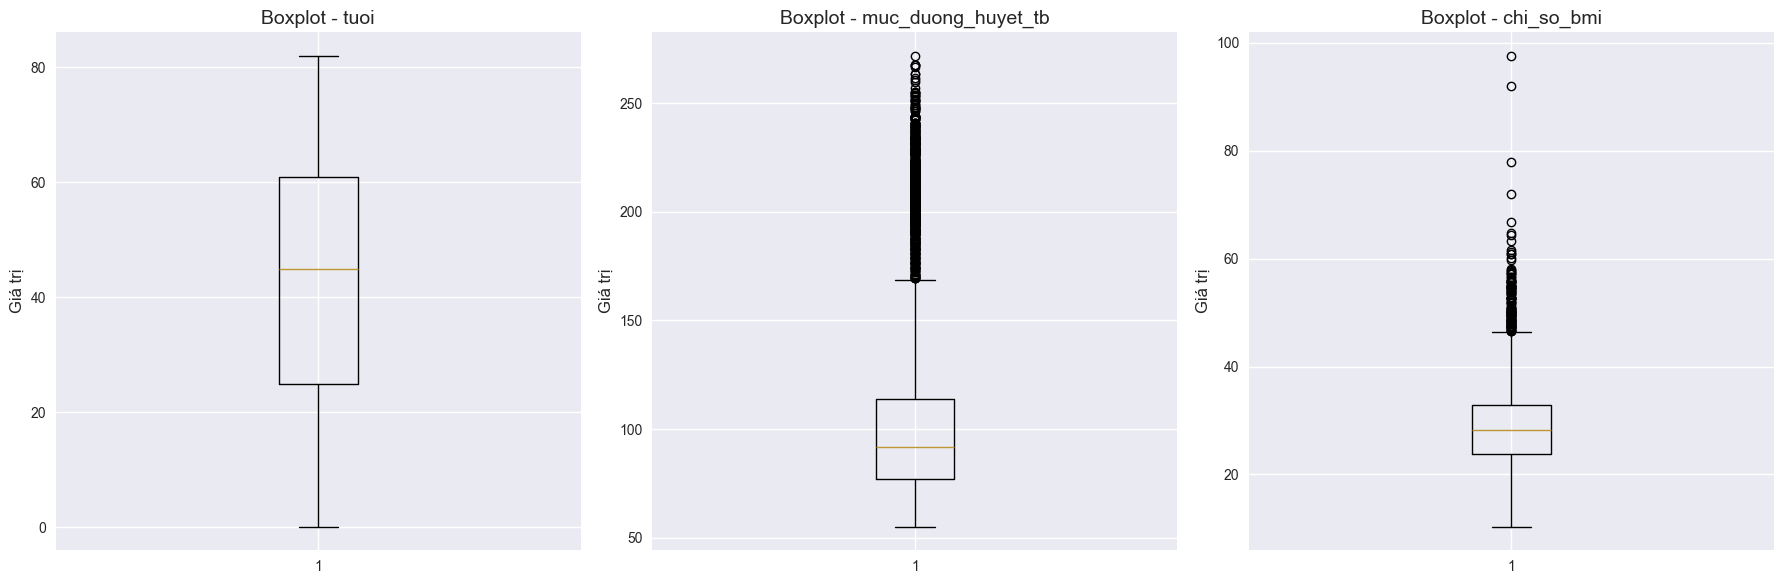


=== XỬ LÝ OUTLIERS CHO BMI ===
Số lượng BMI bất thường (< 10 hoặc > 60): 13


In [6]:
# Kiểm tra và xử lý outliers
print("=== KIỂM TRA OUTLIERS ===")

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Kiểm tra outliers cho các biến số học
numeric_columns = ['tuoi', 'muc_duong_huyet_tb', 'chi_so_bmi']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numeric_columns):
    outliers, lower, upper = detect_outliers_iqr(df_processed, col)
    print(f"\n{col}:")
    print(f"  Số lượng outliers: {len(outliers)}")
    print(f"  Giới hạn dưới: {lower:.2f}")
    print(f"  Giới hạn trên: {upper:.2f}")
    
    # Vẽ boxplot
    axes[i].boxplot(df_processed[col].dropna())
    axes[i].set_title(f'Boxplot - {col}')
    axes[i].set_ylabel('Giá trị')

plt.tight_layout()
plt.show()

# Xử lý outliers cho BMI (chỉ giữ lại giá trị hợp lý)
print("\n=== XỬ LÝ OUTLIERS CHO BMI ===")
bmi_outliers = df_processed[(df_processed['chi_so_bmi'] < 10) | (df_processed['chi_so_bmi'] > 60)]
print(f"Số lượng BMI bất thường (< 10 hoặc > 60): {len(bmi_outliers)}")

# Thay thế BMI bất thường bằng median
df_processed.loc[(df_processed['chi_so_bmi'] < 10) | (df_processed['chi_so_bmi'] > 60), 'chi_so_bmi'] = df_processed['chi_so_bmi'].median()

In [7]:
# Chuyển đổi kiểu dữ liệu
print("=== CHUYỂN ĐỔI KIỂU DỮ LIỆU ===")

# Chuyển đổi các biến phân loại
categorical_columns = ['gioi_tinh', 'da_ket_hon', 'loai_cong_viec', 'noi_cu_tru', 'tinh_trang_hut_thuoc']
for col in categorical_columns:
    df_processed[col] = df_processed[col].astype('category')

# Chuyển đổi biến nhị phân
binary_columns = ['tang_huyet_ap', 'benh_tim', 'dot_quy']
for col in binary_columns:
    df_processed[col] = df_processed[col].astype('int8')

print("Kiểu dữ liệu sau khi xử lý:")
print(df_processed.dtypes)

print("\n=== THỐNG KÊ CUỐI CÙNG ===")
print(f"Kích thước dữ liệu sau xử lý: {df_processed.shape}")
print(f"Số lượng giá trị null: {df_processed.isnull().sum().sum()}")

=== CHUYỂN ĐỔI KIỂU DỮ LIỆU ===
Kiểu dữ liệu sau khi xử lý:
ma_so                      int64
gioi_tinh               category
tuoi                     float64
tang_huyet_ap               int8
benh_tim                    int8
da_ket_hon              category
loai_cong_viec          category
noi_cu_tru              category
muc_duong_huyet_tb       float64
chi_so_bmi               float64
tinh_trang_hut_thuoc    category
dot_quy                     int8
nhom_tuoi               category
dtype: object

=== THỐNG KÊ CUỐI CÙNG ===
Kích thước dữ liệu sau xử lý: (5110, 13)
Số lượng giá trị null: 0


## 4. Phân tích đơn biến

### 4.1 Phân tích biến mục tiêu (đột quỵ)

=== PHÂN TÍCH BIẾN MỤC TIÊU - ĐỘT QUỴ ===
Phân phối đột quỵ:
  Không đột quỵ: 4861 (95.13%)
  Có đột quỵ: 249 (4.87%)


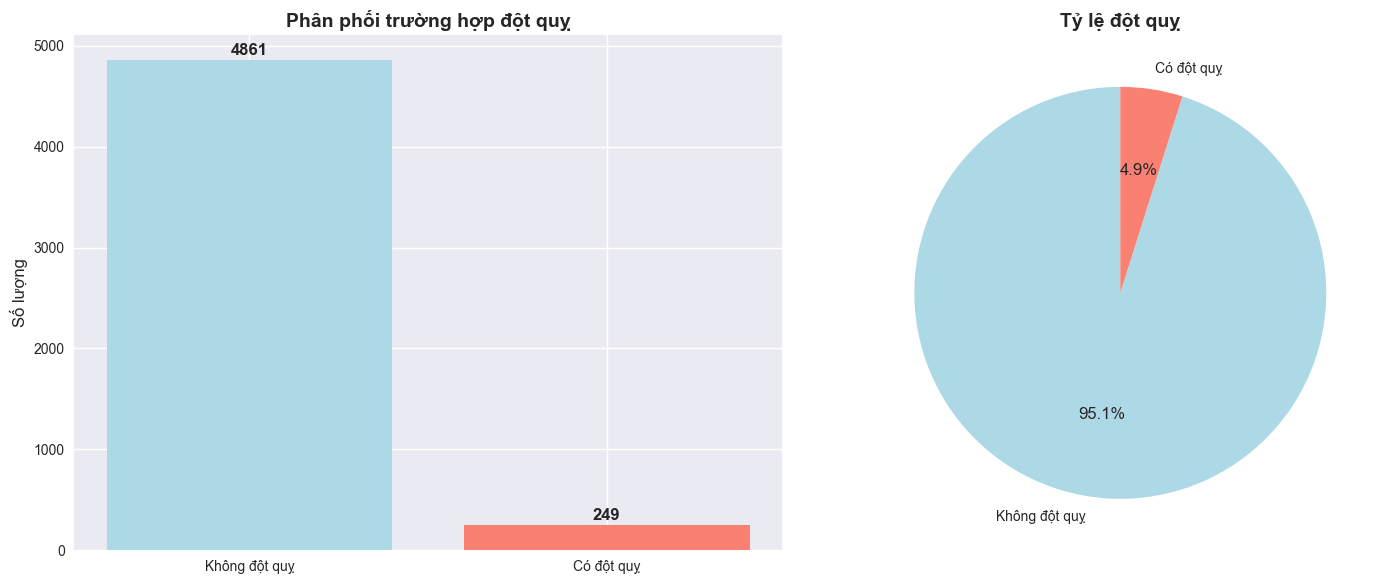


Tỷ lệ mất cân bằng: 95.1% vs 4.9%


In [8]:
# Phân tích biến mục tiêu - đột quỵ
print("=== PHÂN TÍCH BIẾN MỤC TIÊU - ĐỘT QUỴ ===")

stroke_counts = df_processed['dot_quy'].value_counts()
stroke_percentages = df_processed['dot_quy'].value_counts(normalize=True) * 100

print("Phân phối đột quỵ:")
for i in range(len(stroke_counts)):
    label = "Có đột quỵ" if stroke_counts.index[i] == 1 else "Không đột quỵ"
    print(f"  {label}: {stroke_counts.iloc[i]} ({stroke_percentages.iloc[i]:.2f}%)")

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ cột
labels = ['Không đột quỵ', 'Có đột quỵ']
colors = ['lightblue', 'salmon']
axes[0].bar(labels, stroke_counts.values, color=colors)
axes[0].set_title('Phân phối trường hợp đột quỵ', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Số lượng')
for i, v in enumerate(stroke_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Biểu đồ tròn
axes[1].pie(stroke_counts.values, labels=labels, autopct='%1.1f%%', 
           colors=colors, startangle=90)
axes[1].set_title('Tỷ lệ đột quỵ', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTỷ lệ mất cân bằng: {stroke_percentages[0]:.1f}% vs {stroke_percentages[1]:.1f}%")

### 4.2 Phân tích các biến số học

=== PHÂN TÍCH CÁC BIẾN SỐ HỌC ===

Tuổi:
  Trung bình: 43.23
  Trung vị: 45.00
  Độ lệch chuẩn: 22.61
  Min: 0.08
  Max: 82.00

Mức đường huyết trung bình:
  Trung bình: 106.15
  Trung vị: 91.88
  Độ lệch chuẩn: 45.28
  Min: 55.12
  Max: 271.74

Chỉ số BMI:
  Trung bình: 28.77
  Trung vị: 28.20
  Độ lệch chuẩn: 7.42
  Min: 10.30
  Max: 59.70


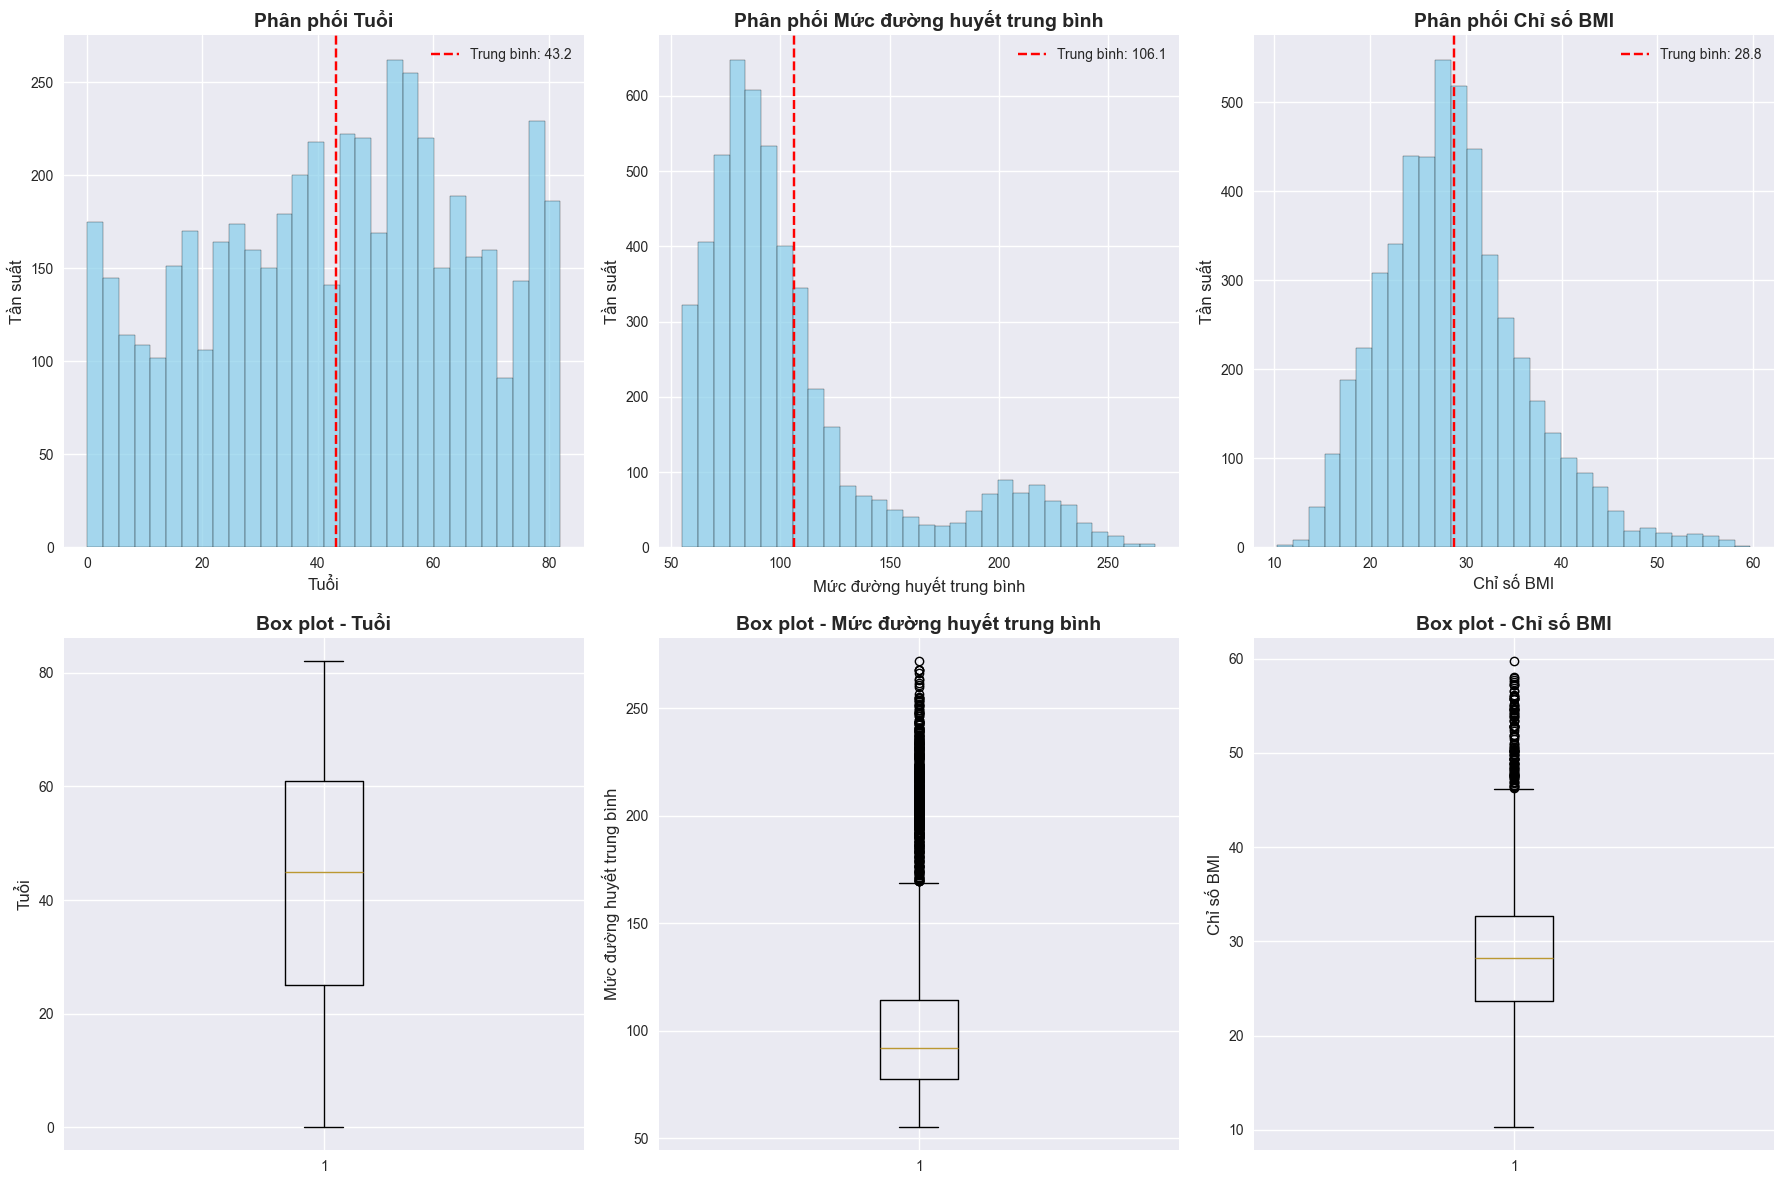

In [9]:
# Phân tích các biến số học
print("=== PHÂN TÍCH CÁC BIẾN SỐ HỌC ===")

numeric_vars = ['tuoi', 'muc_duong_huyet_tb', 'chi_so_bmi']
var_names = ['Tuổi', 'Mức đường huyết trung bình', 'Chỉ số BMI']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (var, name) in enumerate(zip(numeric_vars, var_names)):
    # Histogram
    axes[0, i].hist(df_processed[var], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'Phân phối {name}', fontweight='bold')
    axes[0, i].set_xlabel(name)
    axes[0, i].set_ylabel('Tần suất')
    axes[0, i].axvline(df_processed[var].mean(), color='red', linestyle='--', 
                      label=f'Trung bình: {df_processed[var].mean():.1f}')
    axes[0, i].legend()
    
    # Box plot
    axes[1, i].boxplot(df_processed[var])
    axes[1, i].set_title(f'Box plot - {name}', fontweight='bold')
    axes[1, i].set_ylabel(name)
    
    # Thống kê mô tả
    print(f"\n{name}:")
    print(f"  Trung bình: {df_processed[var].mean():.2f}")
    print(f"  Trung vị: {df_processed[var].median():.2f}")
    print(f"  Độ lệch chuẩn: {df_processed[var].std():.2f}")
    print(f"  Min: {df_processed[var].min():.2f}")
    print(f"  Max: {df_processed[var].max():.2f}")

plt.tight_layout()
plt.show()

### 4.3 Phân tích các biến phân loại

=== PHÂN TÍCH CÁC BIẾN PHÂN LOẠI ===

Giới tính:
  Female: 2994 (58.6%)
  Male: 2115 (41.4%)
  Other: 1 (0.0%)

Tình trạng hôn nhân:
  Yes: 3353 (65.6%)
  No: 1757 (34.4%)

Loại công việc:
  Private: 2925 (57.2%)
  Self-employed: 819 (16.0%)
  children: 687 (13.4%)
  Govt_job: 657 (12.9%)
  Never_worked: 22 (0.4%)

Nơi cư trú:
  Urban: 2596 (50.8%)
  Rural: 2514 (49.2%)

Tình trạng hút thuốc:
  never smoked: 1892 (37.0%)
  Unknown: 1544 (30.2%)
  formerly smoked: 885 (17.3%)
  smokes: 789 (15.4%)


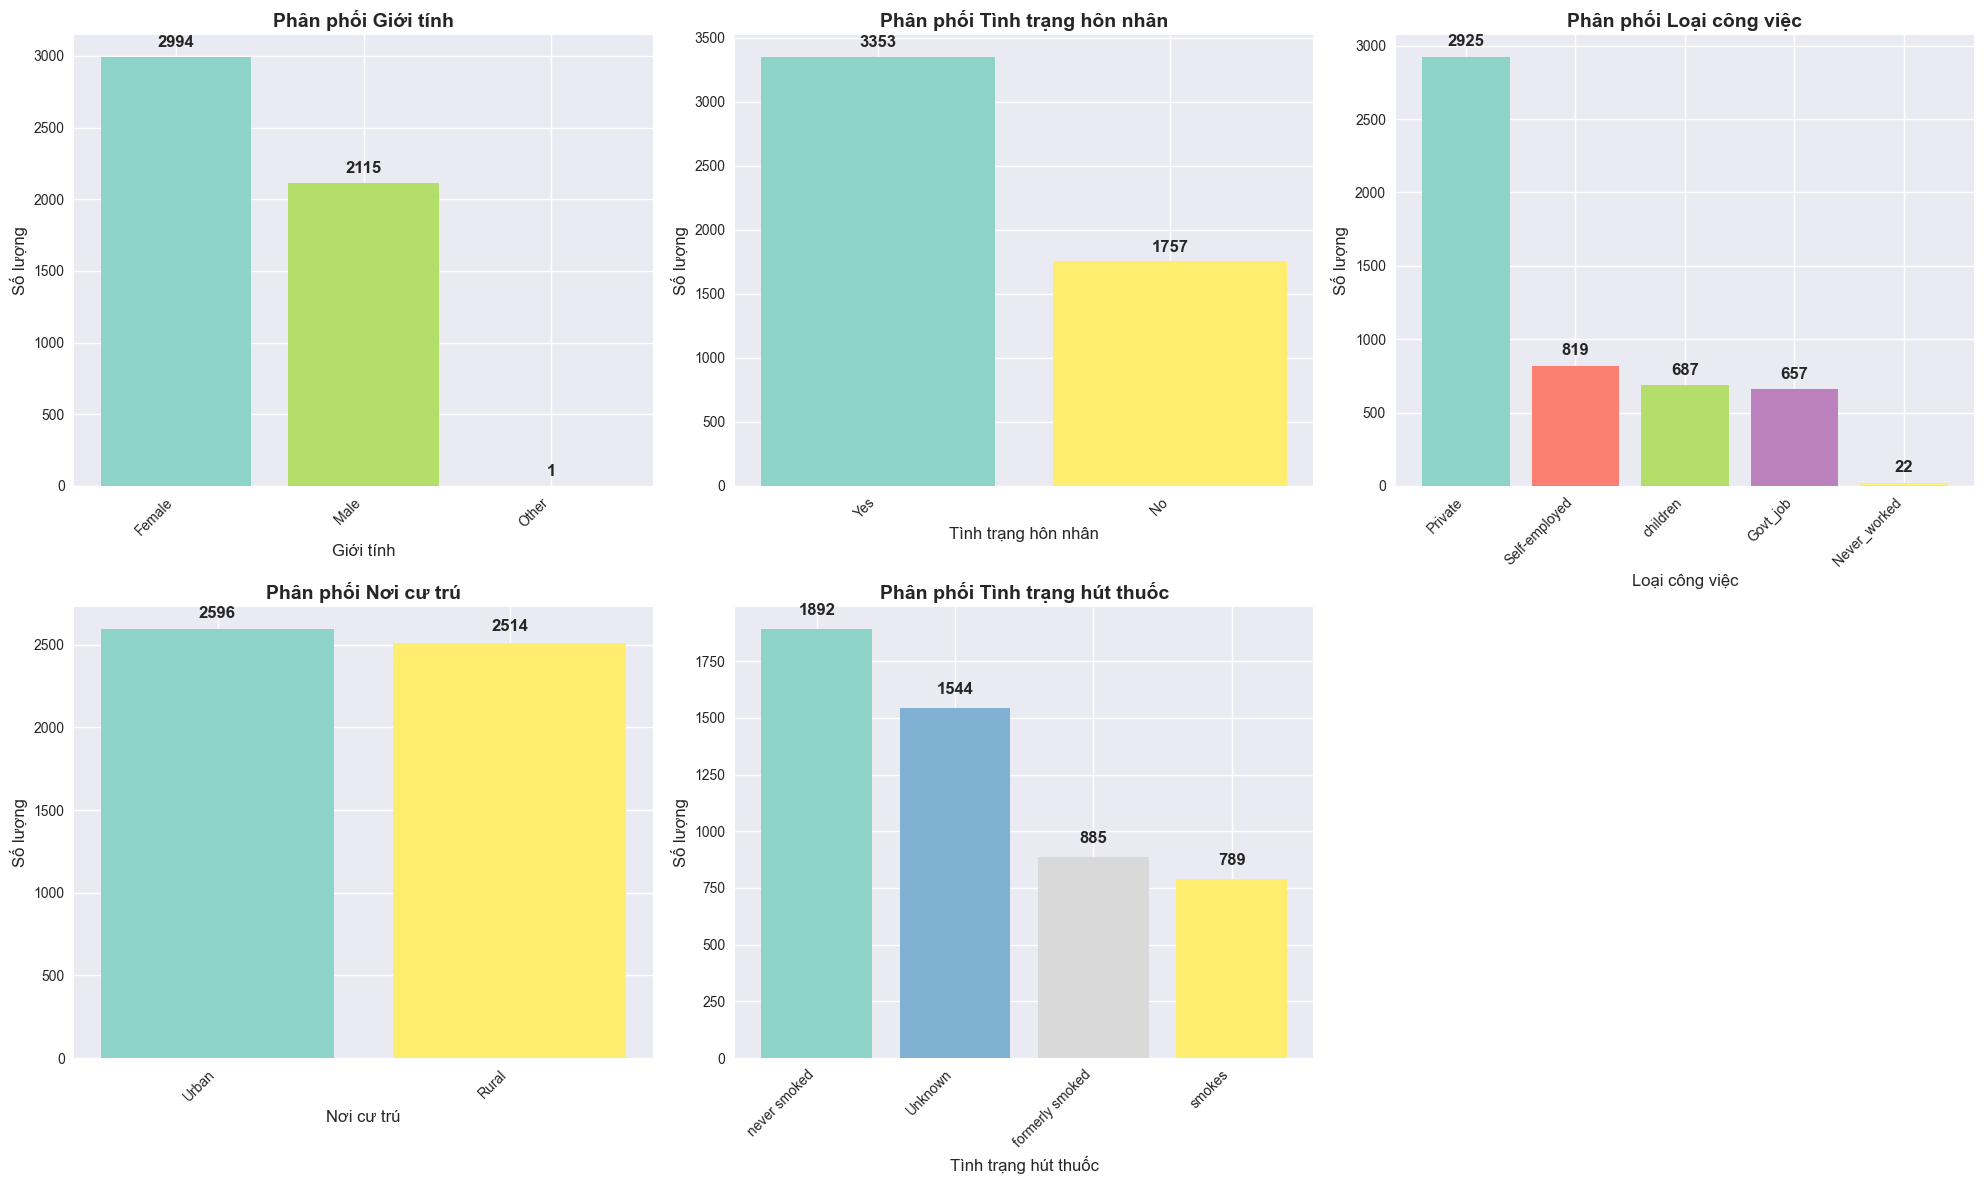

In [10]:
# Phân tích các biến phân loại
print("=== PHÂN TÍCH CÁC BIẾN PHÂN LOẠI ===")

categorical_vars = ['gioi_tinh', 'da_ket_hon', 'loai_cong_viec', 'noi_cu_tru', 'tinh_trang_hut_thuoc']
var_names = ['Giới tính', 'Tình trạng hôn nhân', 'Loại công việc', 'Nơi cư trú', 'Tình trạng hút thuốc']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, (var, name) in enumerate(zip(categorical_vars, var_names)):
    if i < len(axes):
        value_counts = df_processed[var].value_counts()
        
        # Biểu đồ cột
        bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                          color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
        axes[i].set_title(f'Phân phối {name}', fontweight='bold')
        axes[i].set_xlabel(name)
        axes[i].set_ylabel('Số lượng')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
        
        # Thêm nhãn số lượng
        for bar, count in zip(bars, value_counts.values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                        str(count), ha='center', va='bottom', fontweight='bold')
        
        # In thống kê
        print(f"\n{name}:")
        for category, count in value_counts.items():
            percentage = (count / len(df_processed)) * 100
            print(f"  {category}: {count} ({percentage:.1f}%)")

# Ẩn subplot thừa
if len(categorical_vars) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

## 5. Phân tích hai biến

### 5.1 Mối quan hệ giữa tuổi và đột quỵ

=== MỐI QUAN HỆ GIỮA TUỔI VÀ ĐỘT QUỴ ===


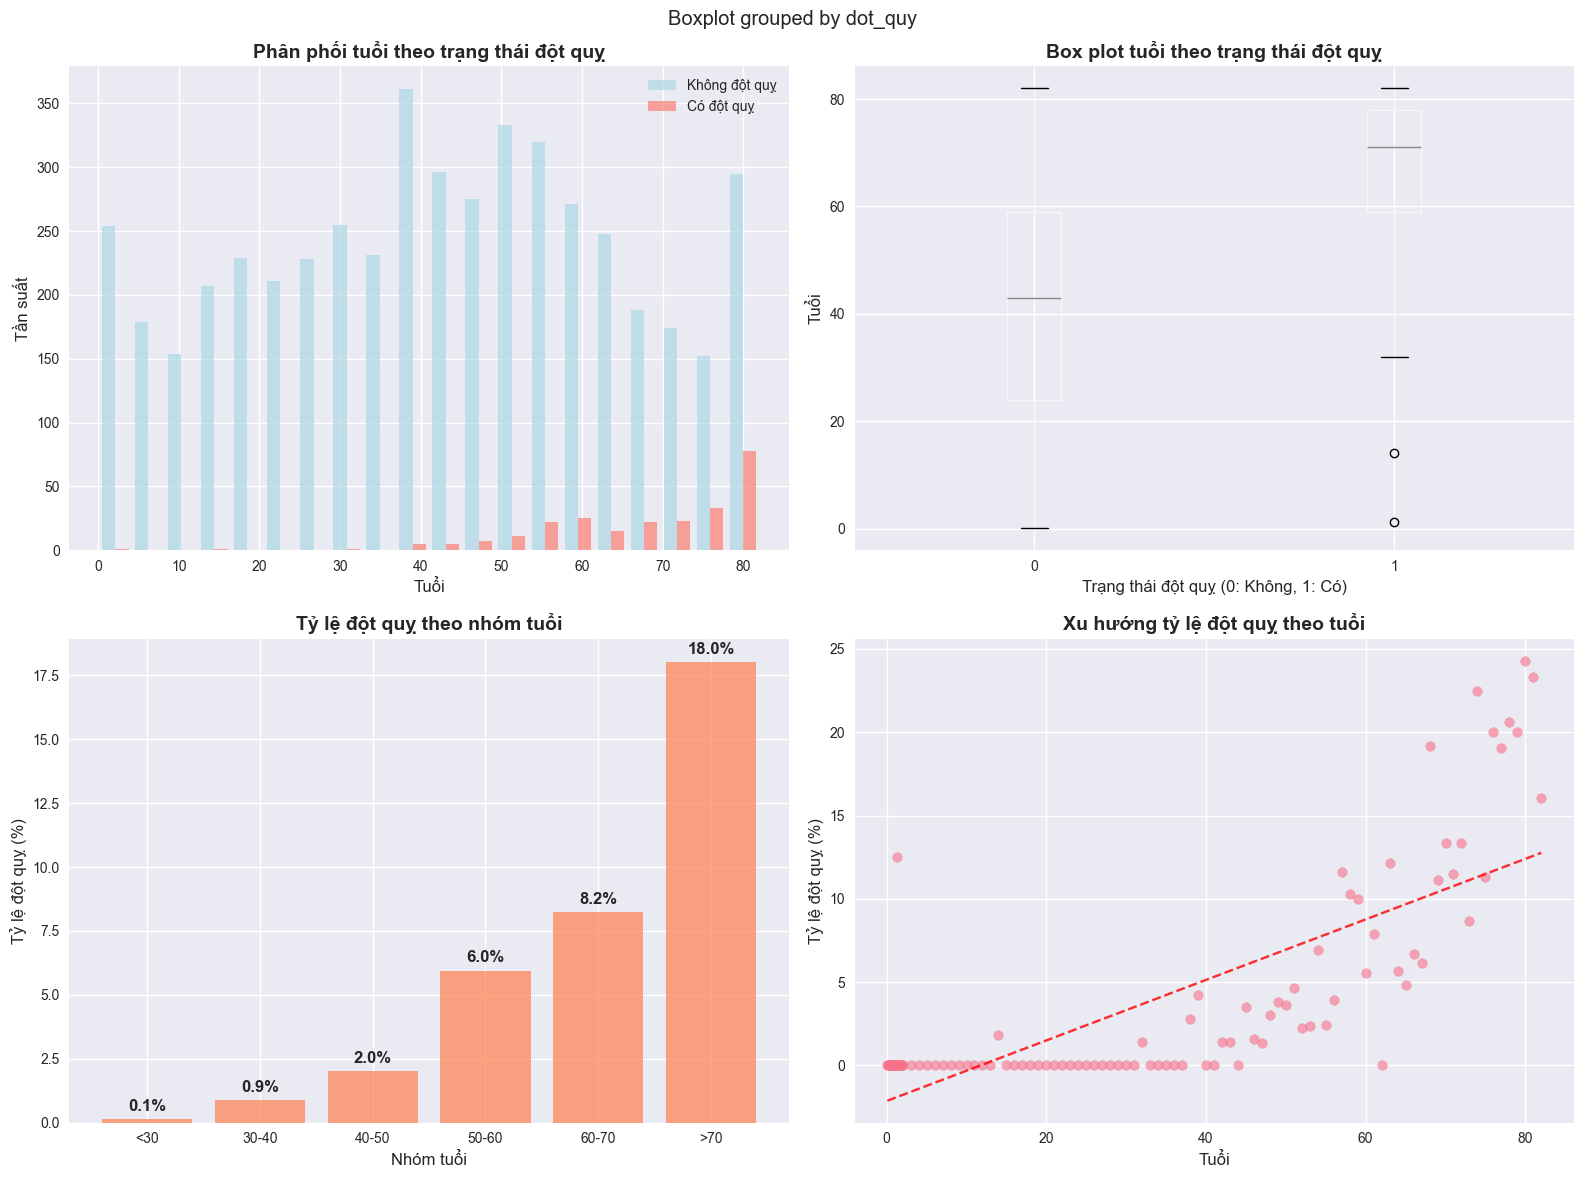


Thống kê tuổi theo trạng thái đột quỵ:
Tuổi trung bình - Không đột quỵ: 42.0
Tuổi trung bình - Có đột quỵ: 67.7
Chênh lệch tuổi trung bình: 25.8 năm

Tỷ lệ đột quỵ theo nhóm tuổi:


,Tổng số,Số ca đột quỵ,Tỷ lệ đột quỵ
tuoi,,,
<30,1570,2,0.001274
30-40,674,6,0.008902
40-50,739,15,0.020298
50-60,823,49,0.059538
60-70,594,49,0.082492
>70,710,128,0.180282


In [11]:
# Phân tích mối quan hệ giữa tuổi và đột quỵ
print("=== MỐI QUAN HỆ GIỮA TUỔI VÀ ĐỘT QUỴ ===")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Phân phối tuổi theo trạng thái đột quỵ
stroke_0 = df_processed[df_processed['dot_quy'] == 0]['tuoi']
stroke_1 = df_processed[df_processed['dot_quy'] == 1]['tuoi']

axes[0, 0].hist([stroke_0, stroke_1], bins=20, alpha=0.7, 
               label=['Không đột quỵ', 'Có đột quỵ'], color=['lightblue', 'salmon'])
axes[0, 0].set_title('Phân phối tuổi theo trạng thái đột quỵ', fontweight='bold')
axes[0, 0].set_xlabel('Tuổi')
axes[0, 0].set_ylabel('Tần suất')
axes[0, 0].legend()

# 2. Box plot tuổi theo đột quỵ
df_processed.boxplot(column='tuoi', by='dot_quy', ax=axes[0, 1])
axes[0, 1].set_title('Box plot tuổi theo trạng thái đột quỵ', fontweight='bold')
axes[0, 1].set_xlabel('Trạng thái đột quỵ (0: Không, 1: Có)')
axes[0, 1].set_ylabel('Tuổi')

# 3. Tỷ lệ đột quỵ theo nhóm tuổi
age_groups = pd.cut(df_processed['tuoi'], bins=[0, 30, 40, 50, 60, 70, 100], 
                   labels=['<30', '30-40', '40-50', '50-60', '60-70', '>70'])
stroke_by_age = df_processed.groupby(age_groups)['dot_quy'].agg(['count', 'sum', 'mean'])
stroke_by_age.columns = ['Tổng số', 'Số ca đột quỵ', 'Tỷ lệ đột quỵ']

bars = axes[1, 0].bar(range(len(stroke_by_age)), stroke_by_age['Tỷ lệ đột quỵ'] * 100, 
                     color='coral', alpha=0.7)
axes[1, 0].set_title('Tỷ lệ đột quỵ theo nhóm tuổi', fontweight='bold')
axes[1, 0].set_xlabel('Nhóm tuổi')
axes[1, 0].set_ylabel('Tỷ lệ đột quỵ (%)')
axes[1, 0].set_xticks(range(len(stroke_by_age)))
axes[1, 0].set_xticklabels(stroke_by_age.index)

# Thêm nhãn tỷ lệ
for i, (bar, rate) in enumerate(zip(bars, stroke_by_age['Tỷ lệ đột quỵ'] * 100)):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
                   f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. Scatter plot với đường xu hướng
age_stroke_rate = df_processed.groupby('tuoi')['dot_quy'].mean().reset_index()
axes[1, 1].scatter(age_stroke_rate['tuoi'], age_stroke_rate['dot_quy'] * 100, alpha=0.6)
z = np.polyfit(age_stroke_rate['tuoi'], age_stroke_rate['dot_quy'] * 100, 1)
p = np.poly1d(z)
axes[1, 1].plot(age_stroke_rate['tuoi'], p(age_stroke_rate['tuoi']), "r--", alpha=0.8)
axes[1, 1].set_title('Xu hướng tỷ lệ đột quỵ theo tuổi', fontweight='bold')
axes[1, 1].set_xlabel('Tuổi')
axes[1, 1].set_ylabel('Tỷ lệ đột quỵ (%)')

plt.tight_layout()
plt.show()

# Thống kê mô tả
print("\nThống kê tuổi theo trạng thái đột quỵ:")
print(f"Tuổi trung bình - Không đột quỵ: {stroke_0.mean():.1f}")
print(f"Tuổi trung bình - Có đột quỵ: {stroke_1.mean():.1f}")
print(f"Chênh lệch tuổi trung bình: {stroke_1.mean() - stroke_0.mean():.1f} năm")

print("\nTỷ lệ đột quỵ theo nhóm tuổi:")
display(stroke_by_age)

### 5.2 Mối quan hệ giữa các yếu tố khác và đột quỵ

=== MỐI QUAN HỆ GIỮA GIỚI TÍNH VÀ ĐỘT QUỴ ===


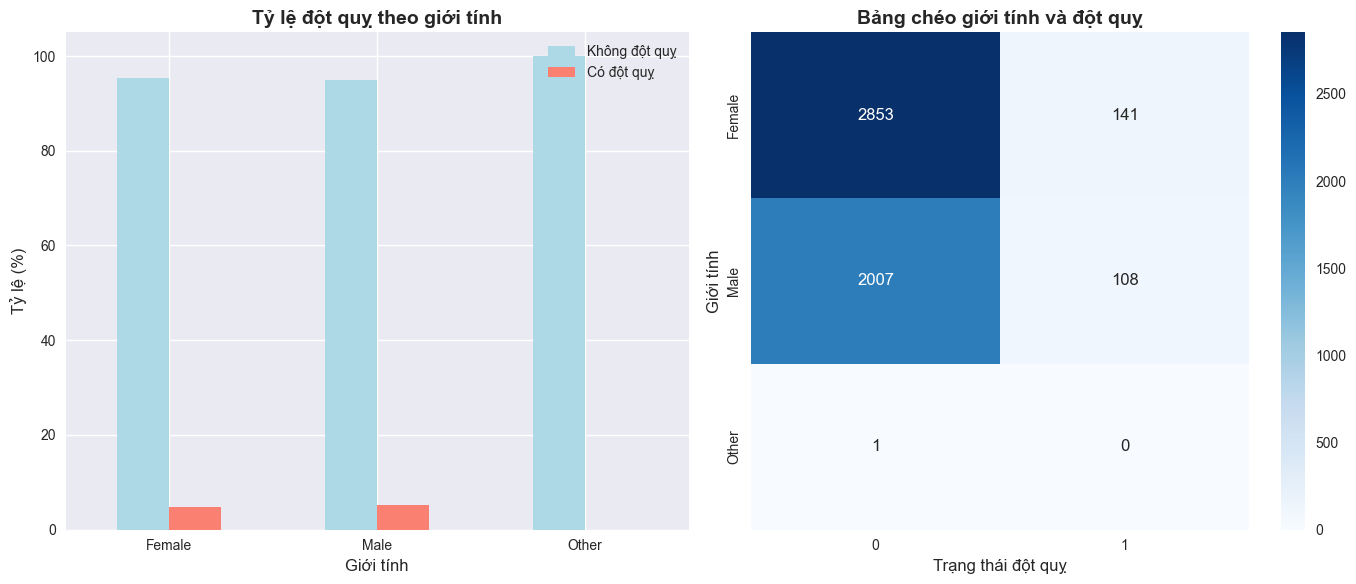

Tỷ lệ đột quỵ theo giới tính:


dot_quy,0,1
gioi_tinh,,
Female,95.290581,4.709419
Male,94.893617,5.106383
Other,100.000000,0.000000



Số lượng theo giới tính:


dot_quy,0,1
gioi_tinh,,
Female,2853,141
Male,2007,108
Other,1,0


In [12]:
# Phân tích mối quan hệ giữa giới tính và đột quỵ
print("=== MỐI QUAN HỆ GIỮA GIỚI TÍNH VÀ ĐỘT QUỴ ===")

gender_stroke = pd.crosstab(df_processed['gioi_tinh'], df_processed['dot_quy'], normalize='index') * 100
gender_counts = pd.crosstab(df_processed['gioi_tinh'], df_processed['dot_quy'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ cột nhóm
gender_stroke.plot(kind='bar', ax=axes[0], color=['lightblue', 'salmon'])
axes[0].set_title('Tỷ lệ đột quỵ theo giới tính', fontweight='bold')
axes[0].set_xlabel('Giới tính')
axes[0].set_ylabel('Tỷ lệ (%)')
axes[0].legend(['Không đột quỵ', 'Có đột quỵ'])
axes[0].tick_params(axis='x', rotation=0)

# Heatmap
sns.heatmap(gender_counts, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Bảng chéo giới tính và đột quỵ', fontweight='bold')
axes[1].set_xlabel('Trạng thái đột quỵ')
axes[1].set_ylabel('Giới tính')

plt.tight_layout()
plt.show()

print("Tỷ lệ đột quỵ theo giới tính:")
display(gender_stroke)
print("\nSố lượng theo giới tính:")
display(gender_counts)

=== PHÂN TÍCH CÁC YẾU TỐ NGUY CƠ KHÁC ===

Tăng huyết áp:
  Không có tăng huyết áp: 3.97% đột quỵ
  Có tăng huyết áp: 13.25% đột quỵ
  Tỷ lệ nguy cơ: 3.3 lần

Bệnh tim:
  Không có bệnh tim: 4.18% đột quỵ
  Có bệnh tim: 17.03% đột quỵ
  Tỷ lệ nguy cơ: 4.1 lần


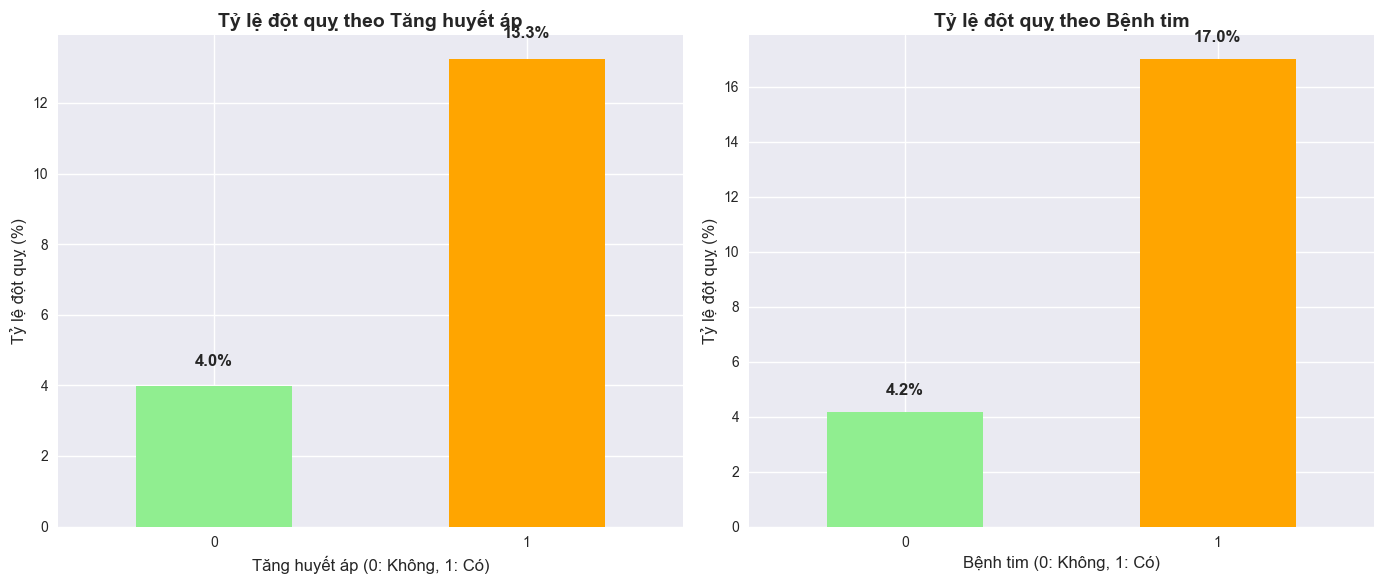

In [13]:
# Phân tích các yếu tố nguy cơ khác
print("=== PHÂN TÍCH CÁC YẾU TỐ NGUY CƠ KHÁC ===")

risk_factors = ['tang_huyet_ap', 'benh_tim']
risk_names = ['Tăng huyết áp', 'Bệnh tim']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, (factor, name) in enumerate(zip(risk_factors, risk_names)):
    # Tính tỷ lệ đột quỵ
    factor_stroke = pd.crosstab(df_processed[factor], df_processed['dot_quy'], normalize='index') * 100
    
    # Vẽ biểu đồ
    factor_stroke[1].plot(kind='bar', ax=axes[i], color=['lightgreen', 'orange'])
    axes[i].set_title(f'Tỷ lệ đột quỵ theo {name}', fontweight='bold')
    axes[i].set_xlabel(f'{name} (0: Không, 1: Có)')
    axes[i].set_ylabel('Tỷ lệ đột quỵ (%)')
    axes[i].tick_params(axis='x', rotation=0)
    
    # Thêm nhãn giá trị
    for j, v in enumerate(factor_stroke[1]):
        axes[i].text(j, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    print(f"\n{name}:")
    print(f"  Không có {name.lower()}: {factor_stroke.loc[0, 1]:.2f}% đột quỵ")
    print(f"  Có {name.lower()}: {factor_stroke.loc[1, 1]:.2f}% đột quỵ")
    print(f"  Tỷ lệ nguy cơ: {factor_stroke.loc[1, 1] / factor_stroke.loc[0, 1]:.1f} lần")

plt.tight_layout()
plt.show()

=== MỐI QUAN HỆ GIỮA CÁC BIẾN SỐ HỌC VÀ ĐỘT QUỴ ===

Mức đường huyết TB:
  Không đột quỵ - Trung bình: 104.80, Trung vị: 91.47
  Có đột quỵ - Trung bình: 132.54, Trung vị: 105.22
  Chênh lệch trung bình: 27.75

Chỉ số BMI:
  Không đột quỵ - Trung bình: 28.70, Trung vị: 28.10
  Có đột quỵ - Trung bình: 30.22, Trung vị: 29.10
  Chênh lệch trung bình: 1.52


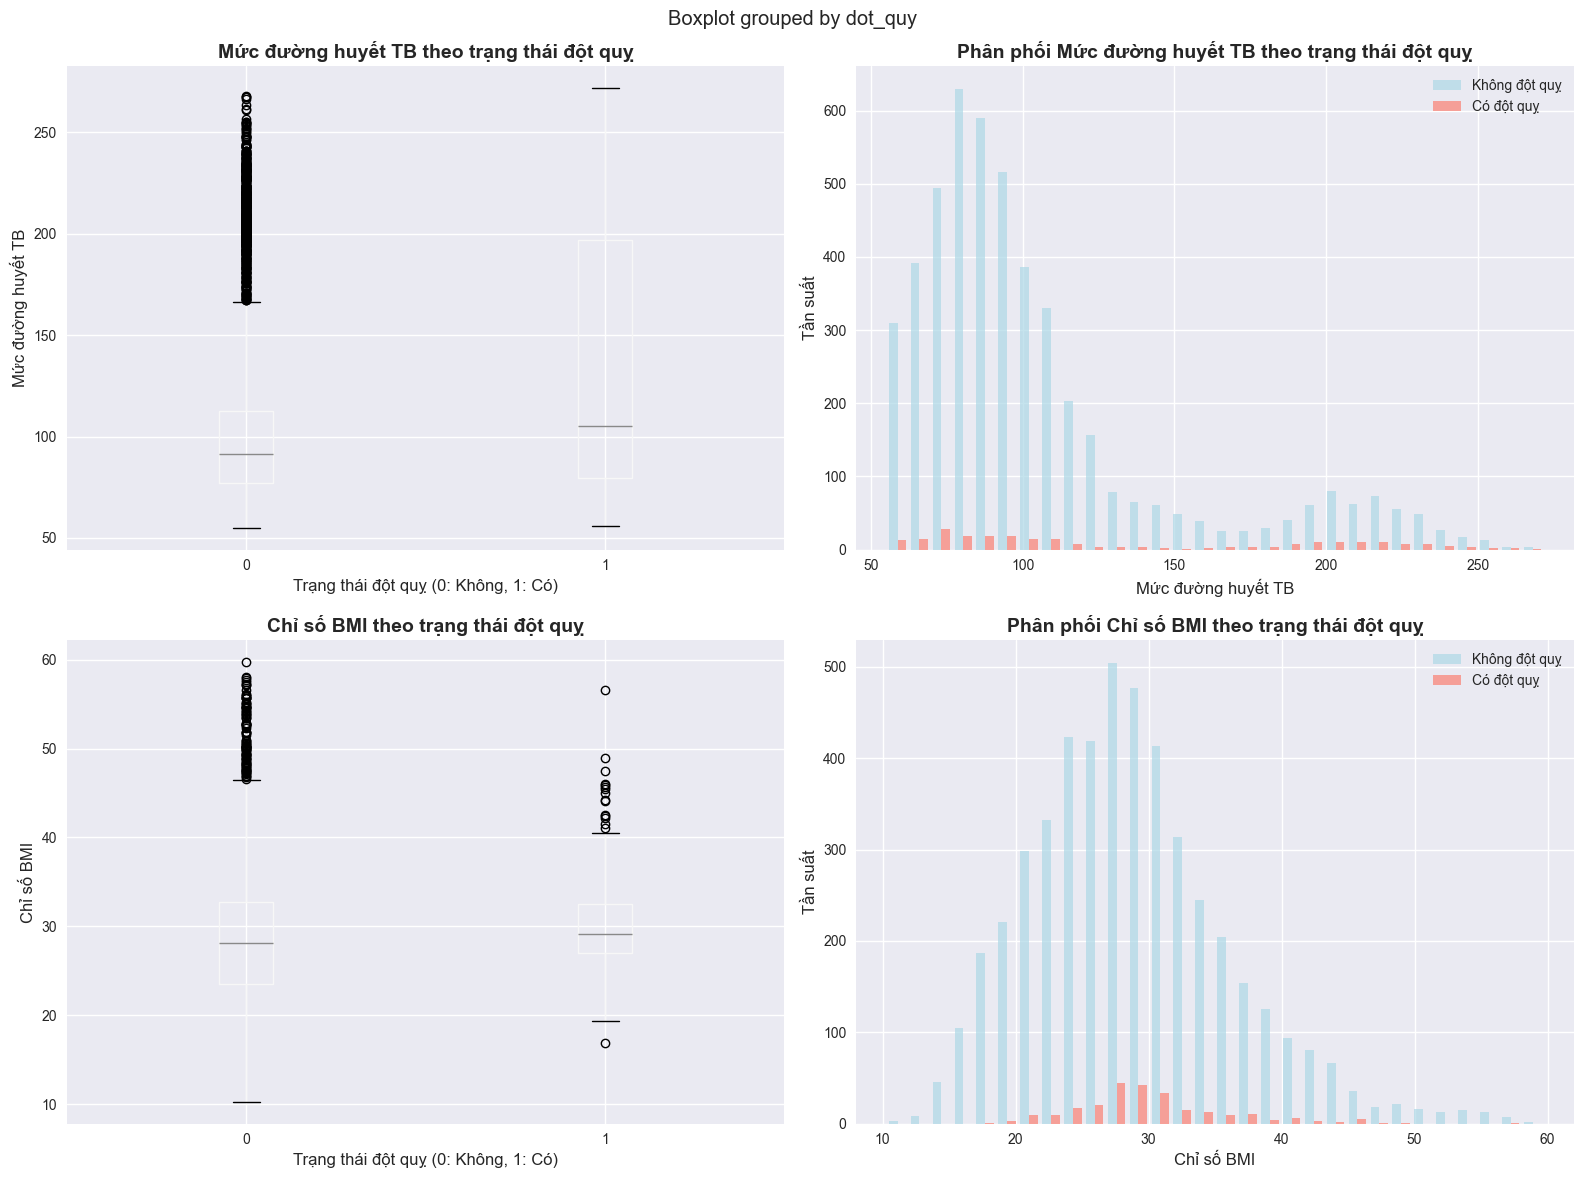

In [14]:
# Phân tích mối quan hệ giữa các biến số học và đột quỵ
print("=== MỐI QUAN HỆ GIỮA CÁC BIẾN SỐ HỌC VÀ ĐỘT QUỴ ===")

numeric_vars = ['muc_duong_huyet_tb', 'chi_so_bmi']
var_names = ['Mức đường huyết TB', 'Chỉ số BMI']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, (var, name) in enumerate(zip(numeric_vars, var_names)):
    # Box plot
    df_processed.boxplot(column=var, by='dot_quy', ax=axes[i, 0])
    axes[i, 0].set_title(f'{name} theo trạng thái đột quỵ', fontweight='bold')
    axes[i, 0].set_xlabel('Trạng thái đột quỵ (0: Không, 1: Có)')
    axes[i, 0].set_ylabel(name)
    
    # Histogram chồng lấp
    no_stroke = df_processed[df_processed['dot_quy'] == 0][var]
    stroke = df_processed[df_processed['dot_quy'] == 1][var]
    
    axes[i, 1].hist([no_stroke, stroke], bins=30, alpha=0.7, 
                   label=['Không đột quỵ', 'Có đột quỵ'], color=['lightblue', 'salmon'])
    axes[i, 1].set_title(f'Phân phối {name} theo trạng thái đột quỵ', fontweight='bold')
    axes[i, 1].set_xlabel(name)
    axes[i, 1].set_ylabel('Tần suất')
    axes[i, 1].legend()
    
    # Thống kê mô tả
    print(f"\n{name}:")
    print(f"  Không đột quỵ - Trung bình: {no_stroke.mean():.2f}, Trung vị: {no_stroke.median():.2f}")
    print(f"  Có đột quỵ - Trung bình: {stroke.mean():.2f}, Trung vị: {stroke.median():.2f}")
    print(f"  Chênh lệch trung bình: {stroke.mean() - no_stroke.mean():.2f}")

plt.tight_layout()
plt.show()

### 5.3 Phân tích tình trạng hút thuốc và đột quỵ

=== MỐI QUAN HỆ GIỮA TÌNH TRẠNG HÚT THUỐC VÀ ĐỘT QUỴ ===


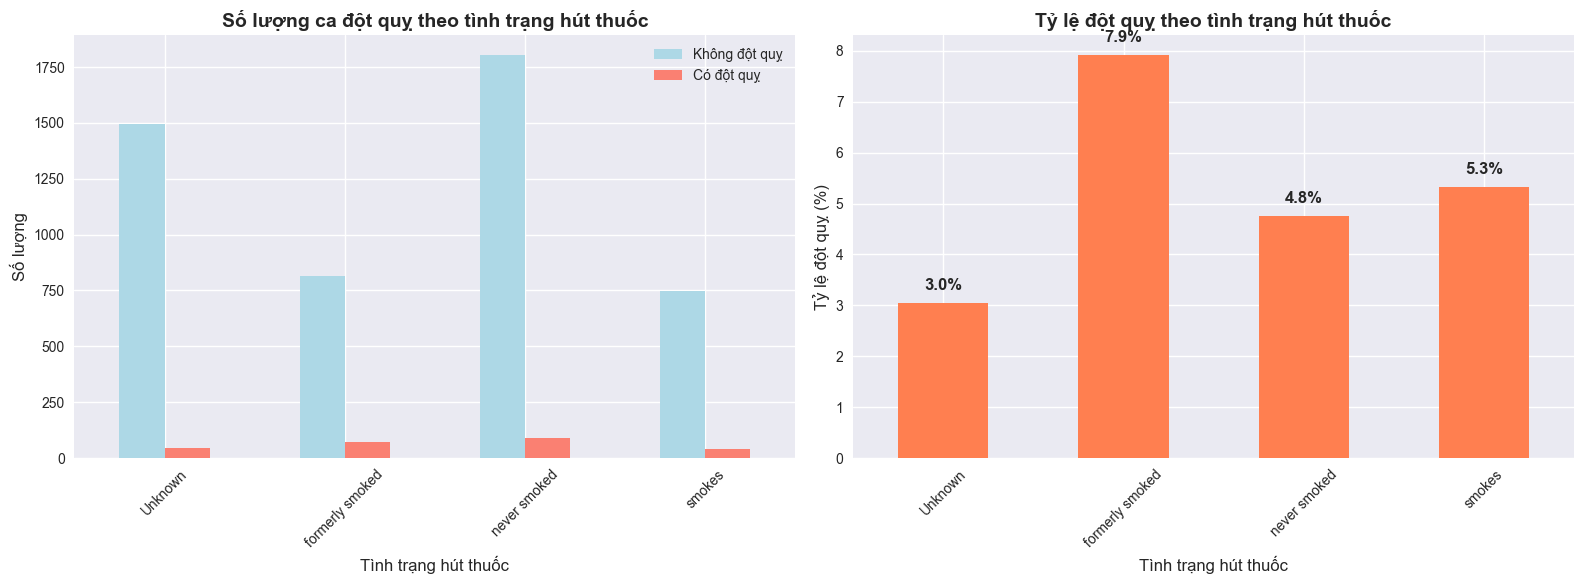

Tỷ lệ đột quỵ theo tình trạng hút thuốc:


dot_quy,0,1
tinh_trang_hut_thuoc,,
Unknown,96.955959,3.044041
formerly smoked,92.090395,7.909605
never smoked,95.243129,4.756871
smokes,94.676806,5.323194



Số lượng ca theo tình trạng hút thuốc:


dot_quy,0,1
tinh_trang_hut_thuoc,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


In [15]:
# Phân tích mối quan hệ giữa tình trạng hút thuốc và đột quỵ
print("=== MỐI QUAN HỆ GIỮA TÌNH TRẠNG HÚT THUỐC VÀ ĐỘT QUỴ ===")

smoking_stroke = pd.crosstab(df_processed['tinh_trang_hut_thuoc'], df_processed['dot_quy'])
smoking_stroke_pct = pd.crosstab(df_processed['tinh_trang_hut_thuoc'], df_processed['dot_quy'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ cột nhóm
smoking_stroke.plot(kind='bar', ax=axes[0], color=['lightblue', 'salmon'])
axes[0].set_title('Số lượng ca đột quỵ theo tình trạng hút thuốc', fontweight='bold')
axes[0].set_xlabel('Tình trạng hút thuốc')
axes[0].set_ylabel('Số lượng')
axes[0].legend(['Không đột quỵ', 'Có đột quỵ'])
axes[0].tick_params(axis='x', rotation=45)

# Biểu đồ tỷ lệ
smoking_stroke_pct[1].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Tỷ lệ đột quỵ theo tình trạng hút thuốc', fontweight='bold')
axes[1].set_xlabel('Tình trạng hút thuốc')
axes[1].set_ylabel('Tỷ lệ đột quỵ (%)')
axes[1].tick_params(axis='x', rotation=45)

# Thêm nhãn giá trị
for i, v in enumerate(smoking_stroke_pct[1]):
    axes[1].text(i, v + 0.2, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Tỷ lệ đột quỵ theo tình trạng hút thuốc:")
display(smoking_stroke_pct)

print("\nSố lượng ca theo tình trạng hút thuốc:")
display(smoking_stroke)

## 6. Phân tích đa biến và kiểm định thống kê

### 6.1 Ma trận tương quan

=== MA TRẬN TƯƠNG QUAN GIỮA CÁC BIẾN SỐ HỌC ===


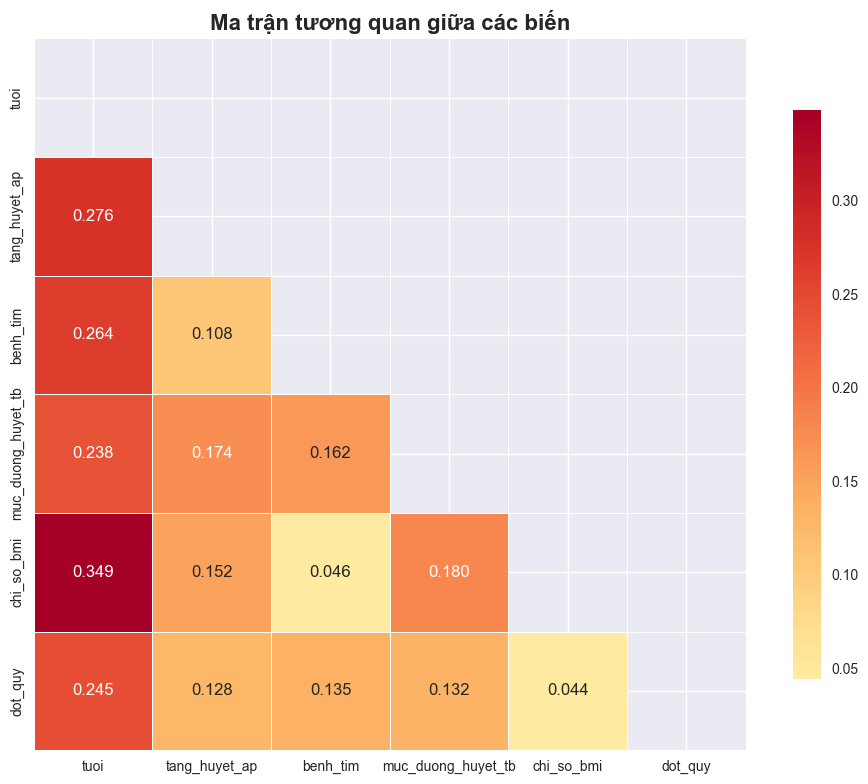

Ma trận tương quan:


,tuoi,tang_huyet_ap,benh_tim,muc_duong_huyet_tb,chi_so_bmi,dot_quy
tuoi,1.000000,0.276398,0.263796,0.238171,0.348955,0.245257
tang_huyet_ap,0.276398,1.000000,0.108306,0.174474,0.151538,0.127904
benh_tim,0.263796,0.108306,1.000000,0.161857,0.046167,0.134914
muc_duong_huyet_tb,0.238171,0.174474,0.161857,1.000000,0.180177,0.131945
chi_so_bmi,0.348955,0.151538,0.046167,0.180177,1.000000,0.044169
dot_quy,0.245257,0.127904,0.134914,0.131945,0.044169,1.000000



Tương quan với đột quỵ (theo độ mạnh):
  tuoi: 0.245
  benh_tim: 0.135
  muc_duong_huyet_tb: 0.132
  tang_huyet_ap: 0.128
  chi_so_bmi: 0.044


In [16]:
# Phân tích tương quan giữa các biến số học
print("=== MA TRẬN TƯƠNG QUAN GIỮA CÁC BIẾN SỐ HỌC ===")

# Chọn các biến số học và nhị phân
correlation_vars = ['tuoi', 'tang_huyet_ap', 'benh_tim', 'muc_duong_huyet_tb', 'chi_so_bmi', 'dot_quy']
corr_matrix = df_processed[correlation_vars].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.3f')
plt.title('Ma trận tương quan giữa các biến', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Ma trận tương quan:")
display(corr_matrix)

# Tìm các tương quan mạnh với đột quỵ
stroke_correlations = corr_matrix['dot_quy'].abs().sort_values(ascending=False)
print("\nTương quan với đột quỵ (theo độ mạnh):")
for var, corr in stroke_correlations.items():
    if var != 'dot_quy':
        print(f"  {var}: {corr:.3f}")

### 6.2 Phân tích nhóm theo nhiều biến

=== PHÂN TÍCH NHÓM THEO TUỔI, GIỚI TÍNH VÀ ĐỘT QUỴ ===


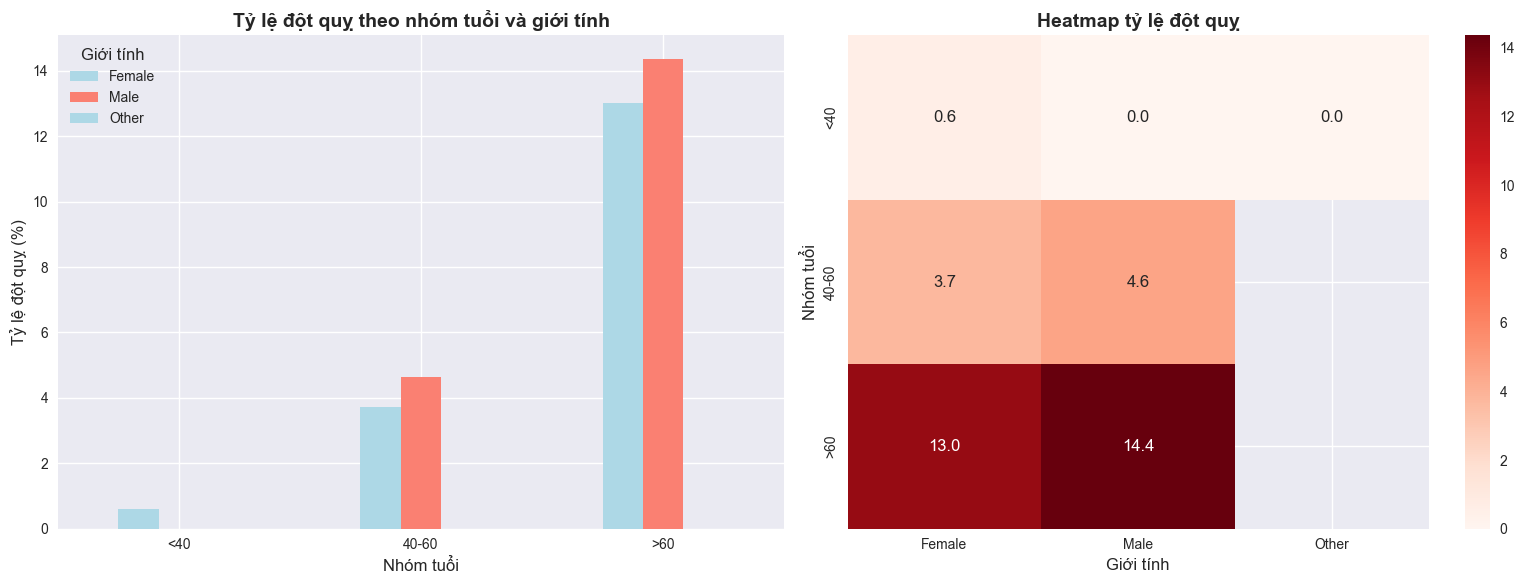

Phân tích theo nhóm tuổi và giới tính:


,Nhóm tuổi,Giới tính,Tổng số,Số ca đột quỵ,Tỷ lệ đột quỵ,Tỷ lệ đột quỵ (%)
0,<40,Female,1319,8,0.006065,0.606520
1,<40,Male,924,0,0.000000,0.000000
2,<40,Other,1,0,0.000000,0.000000
3,40-60,Female,914,34,0.037199,3.719912
4,40-60,Male,648,30,0.046296,4.629630
5,40-60,Other,0,0,NaN,NaN
6,>60,Female,761,99,0.130092,13.009198
7,>60,Male,543,78,0.143646,14.364641
8,>60,Other,0,0,NaN,NaN


In [17]:
# Phân tích nhóm theo tuổi, giới tính và đột quỵ
print("=== PHÂN TÍCH NHÓM THEO TUỔI, GIỚI TÍNH VÀ ĐỘT QUỴ ===")

# Tạo nhóm tuổi
df_processed['nhom_tuoi_phan_tich'] = pd.cut(df_processed['tuoi'], 
                                            bins=[0, 40, 60, 100], 
                                            labels=['<40', '40-60', '>60'])

# Phân tích theo nhóm
group_analysis = df_processed.groupby(['nhom_tuoi_phan_tich', 'gioi_tinh'])['dot_quy'].agg(['count', 'sum', 'mean']).reset_index()
group_analysis.columns = ['Nhóm tuổi', 'Giới tính', 'Tổng số', 'Số ca đột quỵ', 'Tỷ lệ đột quỵ']
group_analysis['Tỷ lệ đột quỵ (%)'] = group_analysis['Tỷ lệ đột quỵ'] * 100

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ cột nhóm
pivot_data = group_analysis.pivot(index='Nhóm tuổi', columns='Giới tính', values='Tỷ lệ đột quỵ (%)')
pivot_data.plot(kind='bar', ax=axes[0], color=['lightblue', 'salmon'])
axes[0].set_title('Tỷ lệ đột quỵ theo nhóm tuổi và giới tính', fontweight='bold')
axes[0].set_xlabel('Nhóm tuổi')
axes[0].set_ylabel('Tỷ lệ đột quỵ (%)')
axes[0].legend(title='Giới tính')
axes[0].tick_params(axis='x', rotation=0)

# Heatmap
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='Reds', ax=axes[1])
axes[1].set_title('Heatmap tỷ lệ đột quỵ', fontweight='bold')
axes[1].set_xlabel('Giới tính')
axes[1].set_ylabel('Nhóm tuổi')

plt.tight_layout()
plt.show()

print("Phân tích theo nhóm tuổi và giới tính:")
display(group_analysis)

### 6.3 Kiểm định thống kê

In [18]:
# Kiểm định t-test cho các biến số học
print("=== KIỂM ĐỊNH T-TEST CHO CÁC BIẾN SỐ HỌC ===")

numeric_vars = ['tuoi', 'muc_duong_huyet_tb', 'chi_so_bmi']
var_names = ['Tuổi', 'Mức đường huyết TB', 'Chỉ số BMI']

for var, name in zip(numeric_vars, var_names):
    no_stroke = df_processed[df_processed['dot_quy'] == 0][var]
    stroke = df_processed[df_processed['dot_quy'] == 1][var]
    
    # Thực hiện t-test
    t_stat, p_value = ttest_ind(stroke, no_stroke)
    
    print(f"\n{name}:")
    print(f"  Trung bình không đột quỵ: {no_stroke.mean():.2f}")
    print(f"  Trung bình có đột quỵ: {stroke.mean():.2f}")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.6f}")
    
    if p_value < 0.001:
        significance = "rất có ý nghĩa (p < 0.001)"
    elif p_value < 0.01:
        significance = "có ý nghĩa (p < 0.01)"
    elif p_value < 0.05:
        significance = "có ý nghĩa (p < 0.05)"
    else:
        significance = "không có ý nghĩa (p >= 0.05)"
    
    print(f"  Kết luận: Sự khác biệt {significance}")

=== KIỂM ĐỊNH T-TEST CHO CÁC BIẾN SỐ HỌC ===

Tuổi:
  Trung bình không đột quỵ: 41.97
  Trung bình có đột quỵ: 67.73
  T-statistic: 18.0808
  P-value: 0.000000
  Kết luận: Sự khác biệt rất có ý nghĩa (p < 0.001)

Mức đường huyết TB:
  Trung bình không đột quỵ: 104.80
  Trung bình có đột quỵ: 132.54
  T-statistic: 9.5134
  P-value: 0.000000
  Kết luận: Sự khác biệt rất có ý nghĩa (p < 0.001)

Chỉ số BMI:
  Trung bình không đột quỵ: 28.70
  Trung bình có đột quỵ: 30.22
  T-statistic: 3.1599
  P-value: 0.001588
  Kết luận: Sự khác biệt có ý nghĩa (p < 0.01)


In [19]:
# Kiểm định Chi-square cho các biến phân loại
print("=== KIỂM ĐỊNH CHI-SQUARE CHO CÁC BIẾN PHÂN LOẠI ===")

categorical_vars = ['gioi_tinh', 'tang_huyet_ap', 'benh_tim', 'da_ket_hon', 'tinh_trang_hut_thuoc']
var_names = ['Giới tính', 'Tăng huyết áp', 'Bệnh tim', 'Tình trạng hôn nhân', 'Tình trạng hút thuốc']

chi_square_results = []

for var, name in zip(categorical_vars, var_names):
    # Tạo bảng chéo
    contingency_table = pd.crosstab(df_processed[var], df_processed['dot_quy'])
    
    # Thực hiện kiểm định Chi-square
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Tính Cramér's V (đo lường mức độ liên kết)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    print(f"\n{name}:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Degrees of freedom: {dof}")
    print(f"  Cramér's V: {cramers_v:.4f}")
    
    if p_value < 0.001:
        significance = "rất có ý nghĩa (p < 0.001)"
    elif p_value < 0.01:
        significance = "có ý nghĩa (p < 0.01)"
    elif p_value < 0.05:
        significance = "có ý nghĩa (p < 0.05)"
    else:
        significance = "không có ý nghĩa (p >= 0.05)"
    
    print(f"  Kết luận: Mối liên kết {significance}")
    
    # Lưu kết quả
    chi_square_results.append({
        'Biến': name,
        'Chi-square': chi2,
        'P-value': p_value,
        'Cramers_V': cramers_v,
        'Ý nghĩa': significance
    })

# Tạo bảng tổng hợp
chi_square_df = pd.DataFrame(chi_square_results)
print("\n=== BẢNG TỔNG HỢP KIỂM ĐỊNH CHI-SQUARE ===")
display(chi_square_df)

=== KIỂM ĐỊNH CHI-SQUARE CHO CÁC BIẾN PHÂN LOẠI ===

Giới tính:
  Chi-square statistic: 0.4726
  P-value: 0.789549
  Degrees of freedom: 2
  Cramér's V: 0.0096
  Kết luận: Mối liên kết không có ý nghĩa (p >= 0.05)

Tăng huyết áp:
  Chi-square statistic: 81.6054
  P-value: 0.000000
  Degrees of freedom: 1
  Cramér's V: 0.1264
  Kết luận: Mối liên kết rất có ý nghĩa (p < 0.001)

Bệnh tim:
  Chi-square statistic: 90.2596
  P-value: 0.000000
  Degrees of freedom: 1
  Cramér's V: 0.1329
  Kết luận: Mối liên kết rất có ý nghĩa (p < 0.001)

Tình trạng hôn nhân:
  Chi-square statistic: 58.9239
  P-value: 0.000000
  Degrees of freedom: 1
  Cramér's V: 0.1074
  Kết luận: Mối liên kết rất có ý nghĩa (p < 0.001)

Tình trạng hút thuốc:
  Chi-square statistic: 29.1473
  P-value: 0.000002
  Degrees of freedom: 3
  Cramér's V: 0.0755
  Kết luận: Mối liên kết rất có ý nghĩa (p < 0.001)

=== BẢNG TỔNG HỢP KIỂM ĐỊNH CHI-SQUARE ===


,Biến,Chi-square,P-value,Cramers_V,Ý nghĩa
0,Giới tính,0.472587,7.895491e-01,0.009617,không có ý nghĩa (p >= 0.05)
1,Tăng huyết áp,81.605368,1.661622e-19,0.126371,rất có ý nghĩa (p < 0.001)
2,Bệnh tim,90.259561,2.088785e-21,0.132903,rất có ý nghĩa (p < 0.001)
3,Tình trạng hôn nhân,58.923890,1.638902e-14,0.107383,rất có ý nghĩa (p < 0.001)
4,Tình trạng hút thuốc,29.147269,2.085400e-06,0.075525,rất có ý nghĩa (p < 0.001)


## 7. Trực quan hóa nâng cao

### 7.1 Biểu đồ phân phối kết hợp (Pair plots)

=== BIỂU ĐỒ PHÂN PHỐI KẾT HỢP ===


<Figure size 1200x1000 with 0 Axes>

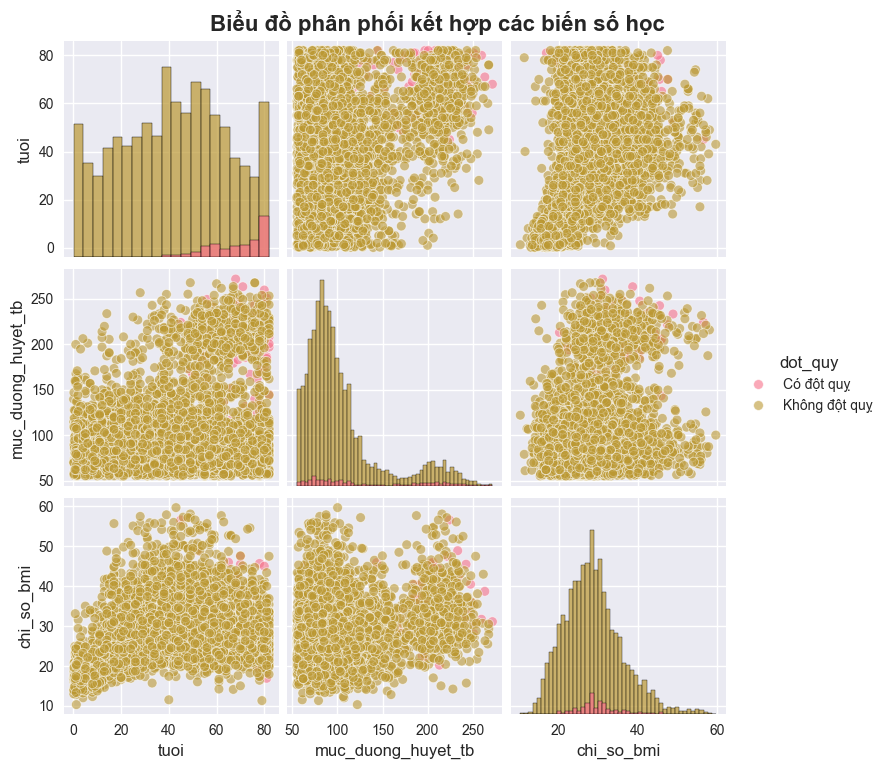

In [20]:
# Biểu đồ phân phối kết hợp
print("=== BIỂU ĐỒ PHÂN PHỐI KẾT HỢP ===")

# Chọn các biến số học để vẽ pair plot
pair_vars = ['tuoi', 'muc_duong_huyet_tb', 'chi_so_bmi']
pair_data = df_processed[pair_vars + ['dot_quy']].copy()
pair_data['dot_quy'] = pair_data['dot_quy'].map({0: 'Không đột quỵ', 1: 'Có đột quỵ'})

# Vẽ pair plot
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(pair_data, hue='dot_quy', diag_kind='hist', 
                        plot_kws={'alpha': 0.6}, diag_kws={'alpha': 0.7})
pair_plot.fig.suptitle('Biểu đồ phân phối kết hợp các biến số học', 
                      fontsize=16, fontweight='bold', y=1.02)
plt.show()

### 7.2 Biểu đồ violin/box plot nâng cao

=== BIỂU ĐỒ VIOLIN PLOT ===


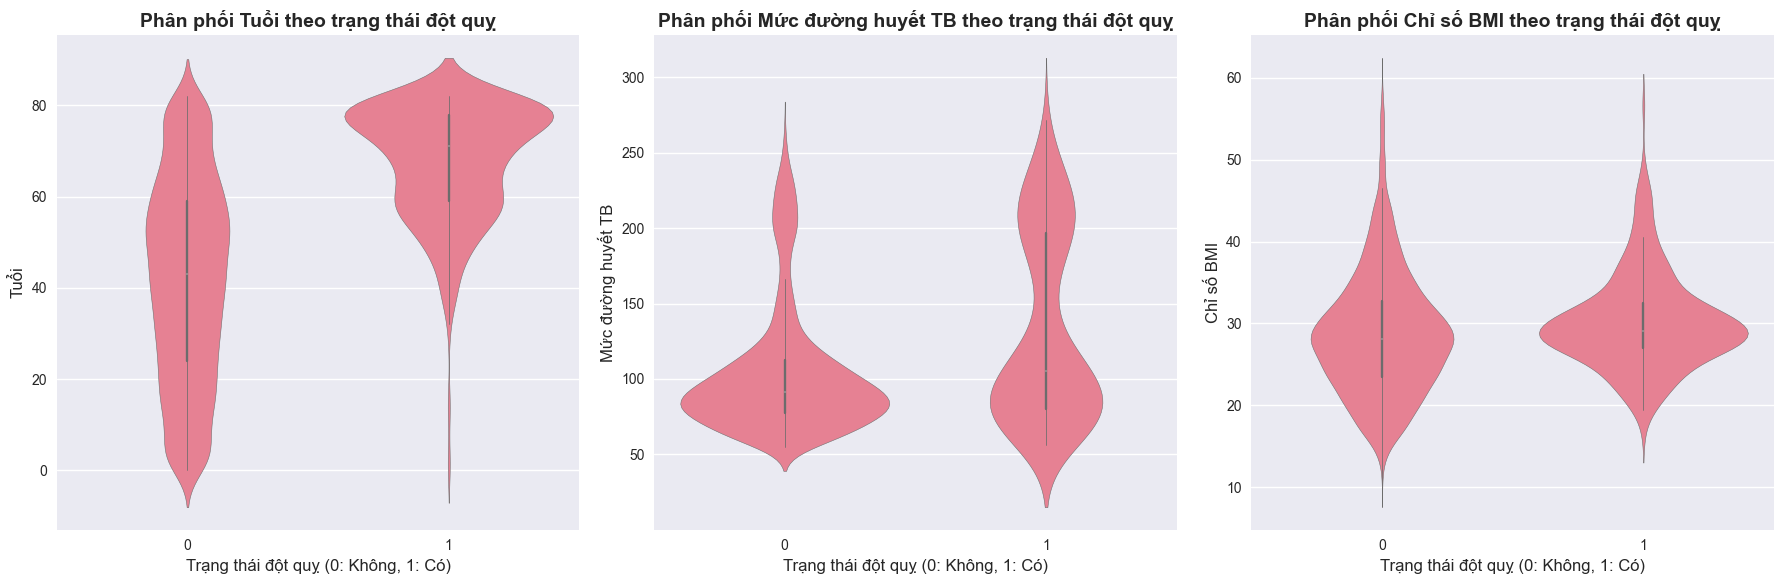

In [21]:
# Biểu đồ violin plot cho các biến số học
print("=== BIỂU ĐỒ VIOLIN PLOT ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (var, name) in enumerate(zip(['tuoi', 'muc_duong_huyet_tb', 'chi_so_bmi'], 
                                   ['Tuổi', 'Mức đường huyết TB', 'Chỉ số BMI'])):
    sns.violinplot(data=df_processed, x='dot_quy', y=var, ax=axes[i])
    axes[i].set_title(f'Phân phối {name} theo trạng thái đột quỵ', fontweight='bold')
    axes[i].set_xlabel('Trạng thái đột quỵ (0: Không, 1: Có)')
    axes[i].set_ylabel(name)

plt.tight_layout()
plt.show()

### 7.3 Biểu đồ tương tác với Plotly

In [22]:
# Biểu đồ tương tác với Plotly
print("=== BIỂU ĐỒ TƯƠNG TÁC VỚI PLOTLY ===")

# 1. Scatter plot 3D
fig_3d = px.scatter_3d(df_processed, x='tuoi', y='muc_duong_huyet_tb', z='chi_so_bmi',
                      color='dot_quy', 
                      color_discrete_map={0: 'lightblue', 1: 'salmon'},
                      title='Biểu đồ 3D: Tuổi, Đường huyết, BMI theo trạng thái đột quỵ',
                      labels={'tuoi': 'Tuổi', 
                             'muc_duong_huyet_tb': 'Mức đường huyết TB',
                             'chi_so_bmi': 'Chỉ số BMI',
                             'dot_quy': 'Đột quỵ'})
fig_3d.show()

# 2. Sunburst chart cho các biến phân loại
sunburst_data = df_processed.groupby(['gioi_tinh', 'da_ket_hon', 'dot_quy']).size().reset_index(name='count')
sunburst_data['dot_quy_label'] = sunburst_data['dot_quy'].map({0: 'Không đột quỵ', 1: 'Có đột quỵ'})

fig_sunburst = px.sunburst(sunburst_data, 
                          path=['gioi_tinh', 'da_ket_hon', 'dot_quy_label'], 
                          values='count',
                          title='Phân phối đột quỵ theo giới tính và tình trạng hôn nhân')
fig_sunburst.show()

# 3. Box plot tương tác
fig_box = px.box(df_processed, x='gioi_tinh', y='tuoi', color='dot_quy',
                color_discrete_map={0: 'lightblue', 1: 'salmon'},
                title='Phân phối tuổi theo giới tính và trạng thái đột quỵ',
                labels={'gioi_tinh': 'Giới tính', 'tuoi': 'Tuổi', 'dot_quy': 'Đột quỵ'})
fig_box.show()

=== BIỂU ĐỒ TƯƠNG TÁC VỚI PLOTLY ===


## 8. Kết luận và Insights

### 8.1 Tổng hợp các phát hiện chính

In [23]:
# Tổng hợp các phát hiện chính
print("=== TỔNG HỢP CÁC PHÁT HIỆN CHÍNH ===")

# 1. Thống kê tổng quan
total_patients = len(df_processed)
stroke_cases = df_processed['dot_quy'].sum()
stroke_rate = (stroke_cases / total_patients) * 100

print(f"\n1. THỐNG KÊ TỔNG QUAN:")
print(f"   - Tổng số bệnh nhân: {total_patients:,}")
print(f"   - Số ca đột quỵ: {stroke_cases:,}")
print(f"   - Tỷ lệ đột quỵ: {stroke_rate:.2f}%")

# 2. Yếu tố tuổi
avg_age_no_stroke = df_processed[df_processed['dot_quy'] == 0]['tuoi'].mean()
avg_age_stroke = df_processed[df_processed['dot_quy'] == 1]['tuoi'].mean()

print(f"\n2. YẾU TỐ TUỔI:")
print(f"   - Tuổi trung bình (không đột quỵ): {avg_age_no_stroke:.1f}")
print(f"   - Tuổi trung bình (có đột quỵ): {avg_age_stroke:.1f}")
print(f"   - Chênh lệch: {avg_age_stroke - avg_age_no_stroke:.1f} năm")

# 3. Yếu tố nguy cơ
hypertension_risk = df_processed[df_processed['tang_huyet_ap'] == 1]['dot_quy'].mean() * 100
no_hypertension_risk = df_processed[df_processed['tang_huyet_ap'] == 0]['dot_quy'].mean() * 100

heart_disease_risk = df_processed[df_processed['benh_tim'] == 1]['dot_quy'].mean() * 100
no_heart_disease_risk = df_processed[df_processed['benh_tim'] == 0]['dot_quy'].mean() * 100

print(f"\n3. CÁC YẾU TỐ NGUY CƠ:")
print(f"   - Tăng huyết áp: {hypertension_risk:.1f}% vs {no_hypertension_risk:.1f}% (tỷ lệ nguy cơ: {hypertension_risk/no_hypertension_risk:.1f}x)")
print(f"   - Bệnh tim: {heart_disease_risk:.1f}% vs {no_heart_disease_risk:.1f}% (tỷ lệ nguy cơ: {heart_disease_risk/no_heart_disease_risk:.1f}x)")

# 4. Yếu tố giới tính
male_stroke_rate = df_processed[df_processed['gioi_tinh'] == 'Male']['dot_quy'].mean() * 100
female_stroke_rate = df_processed[df_processed['gioi_tinh'] == 'Female']['dot_quy'].mean() * 100

print(f"\n4. YẾU TỐ GIỚI TÍNH:")
print(f"   - Nam giới: {male_stroke_rate:.2f}%")
print(f"   - Nữ giới: {female_stroke_rate:.2f}%")

# 5. Các biến số học
avg_glucose_no_stroke = df_processed[df_processed['dot_quy'] == 0]['muc_duong_huyet_tb'].mean()
avg_glucose_stroke = df_processed[df_processed['dot_quy'] == 1]['muc_duong_huyet_tb'].mean()

avg_bmi_no_stroke = df_processed[df_processed['dot_quy'] == 0]['chi_so_bmi'].mean()
avg_bmi_stroke = df_processed[df_processed['dot_quy'] == 1]['chi_so_bmi'].mean()

print(f"\n5. CÁC BIẾN SỐ HỌC:")
print(f"   - Đường huyết TB (không đột quỵ): {avg_glucose_no_stroke:.1f}")
print(f"   - Đường huyết TB (có đột quỵ): {avg_glucose_stroke:.1f}")
print(f"   - BMI (không đột quỵ): {avg_bmi_no_stroke:.1f}")
print(f"   - BMI (có đột quỵ): {avg_bmi_stroke:.1f}")

=== TỔNG HỢP CÁC PHÁT HIỆN CHÍNH ===

1. THỐNG KÊ TỔNG QUAN:
   - Tổng số bệnh nhân: 5,110
   - Số ca đột quỵ: 249
   - Tỷ lệ đột quỵ: 4.87%

2. YẾU TỐ TUỔI:
   - Tuổi trung bình (không đột quỵ): 42.0
   - Tuổi trung bình (có đột quỵ): 67.7
   - Chênh lệch: 25.8 năm

3. CÁC YẾU TỐ NGUY CƠ:
   - Tăng huyết áp: 13.3% vs 4.0% (tỷ lệ nguy cơ: 3.3x)
   - Bệnh tim: 17.0% vs 4.2% (tỷ lệ nguy cơ: 4.1x)

4. YẾU TỐ GIỚI TÍNH:
   - Nam giới: 5.11%
   - Nữ giới: 4.71%

5. CÁC BIẾN SỐ HỌC:
   - Đường huyết TB (không đột quỵ): 104.8
   - Đường huyết TB (có đột quỵ): 132.5
   - BMI (không đột quỵ): 28.7
   - BMI (có đột quỵ): 30.2


### 8.2 Xác định các yếu tố nguy cơ hàng đầu

=== CÁC YẾU TỐ NGUY CƠ HÀNG ĐẦU ===

Bảng xếp hạng các yếu tố nguy cơ:


,Yếu tố nguy cơ,Tỷ lệ đột quỵ (%),Tỷ lệ đối chứng (%),Tỷ lệ nguy cơ
0,Tuổi > 60,13.573620,1.891750,7.175166
2,Bệnh tim,17.028986,4.178734,4.075154
1,Tăng huyết áp,13.253012,3.967910,3.340049
3,Đường huyết > 200,12.903226,4.127459,3.126191
4,BMI > 30,5.355304,4.577020,1.170042


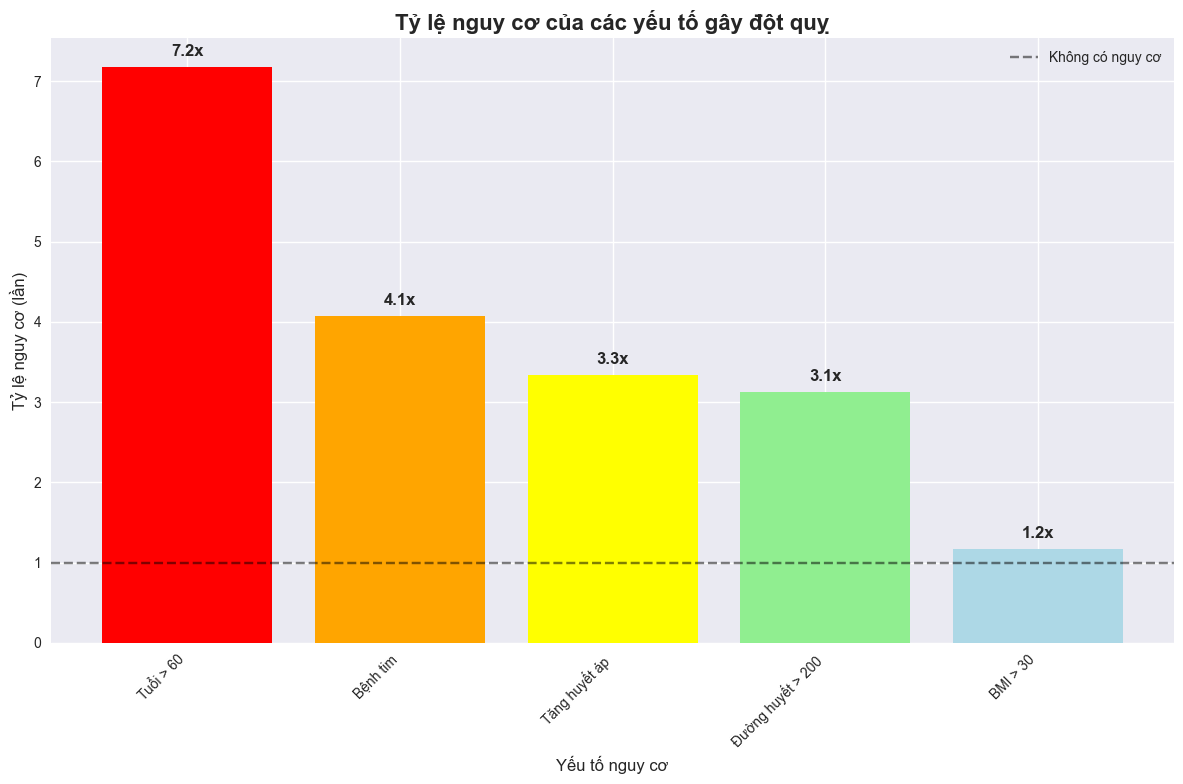

In [24]:
# Xác định các yếu tố nguy cơ hàng đầu
print("=== CÁC YẾU TỐ NGUY CƠ HÀNG ĐẦU ===")

# Tính tỷ lệ nguy cơ cho các yếu tố
risk_factors_analysis = []

# 1. Tuổi (>60 vs <=60)
old_stroke_rate = df_processed[df_processed['tuoi'] > 60]['dot_quy'].mean() * 100
young_stroke_rate = df_processed[df_processed['tuoi'] <= 60]['dot_quy'].mean() * 100
age_risk_ratio = old_stroke_rate / young_stroke_rate if young_stroke_rate > 0 else float('inf')
risk_factors_analysis.append(['Tuổi > 60', old_stroke_rate, young_stroke_rate, age_risk_ratio])

# 2. Tăng huyết áp
hyp_risk_ratio = hypertension_risk / no_hypertension_risk if no_hypertension_risk > 0 else float('inf')
risk_factors_analysis.append(['Tăng huyết áp', hypertension_risk, no_hypertension_risk, hyp_risk_ratio])

# 3. Bệnh tim
heart_risk_ratio = heart_disease_risk / no_heart_disease_risk if no_heart_disease_risk > 0 else float('inf')
risk_factors_analysis.append(['Bệnh tim', heart_disease_risk, no_heart_disease_risk, heart_risk_ratio])

# 4. Đường huyết cao (>200 vs <=200)
high_glucose_stroke_rate = df_processed[df_processed['muc_duong_huyet_tb'] > 200]['dot_quy'].mean() * 100
normal_glucose_stroke_rate = df_processed[df_processed['muc_duong_huyet_tb'] <= 200]['dot_quy'].mean() * 100
glucose_risk_ratio = high_glucose_stroke_rate / normal_glucose_stroke_rate if normal_glucose_stroke_rate > 0 else float('inf')
risk_factors_analysis.append(['Đường huyết > 200', high_glucose_stroke_rate, normal_glucose_stroke_rate, glucose_risk_ratio])

# 5. BMI cao (>30 vs <=30)
high_bmi_stroke_rate = df_processed[df_processed['chi_so_bmi'] > 30]['dot_quy'].mean() * 100
normal_bmi_stroke_rate = df_processed[df_processed['chi_so_bmi'] <= 30]['dot_quy'].mean() * 100
bmi_risk_ratio = high_bmi_stroke_rate / normal_bmi_stroke_rate if normal_bmi_stroke_rate > 0 else float('inf')
risk_factors_analysis.append(['BMI > 30', high_bmi_stroke_rate, normal_bmi_stroke_rate, bmi_risk_ratio])

# Tạo DataFrame và sắp xếp theo tỷ lệ nguy cơ
risk_df = pd.DataFrame(risk_factors_analysis, 
                      columns=['Yếu tố nguy cơ', 'Tỷ lệ đột quỵ (%)', 'Tỷ lệ đối chứng (%)', 'Tỷ lệ nguy cơ'])
risk_df = risk_df.sort_values('Tỷ lệ nguy cơ', ascending=False)

print("\nBảng xếp hạng các yếu tố nguy cơ:")
display(risk_df)

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(risk_df)), risk_df['Tỷ lệ nguy cơ'], 
               color=['red', 'orange', 'yellow', 'lightgreen', 'lightblue'])
plt.title('Tỷ lệ nguy cơ của các yếu tố gây đột quỵ', fontsize=16, fontweight='bold')
plt.xlabel('Yếu tố nguy cơ')
plt.ylabel('Tỷ lệ nguy cơ (lần)')
plt.xticks(range(len(risk_df)), risk_df['Yếu tố nguy cơ'], rotation=45, ha='right')

# Thêm nhãn giá trị
for i, (bar, value) in enumerate(zip(bars, risk_df['Tỷ lệ nguy cơ'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{value:.1f}x', ha='center', va='bottom', fontweight='bold')

plt.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='Không có nguy cơ')
plt.legend()
plt.tight_layout()
plt.show()

### 8.3 Đề xuất hướng phân tích tiếp theo

In [25]:
# Đề xuất hướng phân tích tiếp theo
print("=== ĐỀ XUẤT HƯỚNG PHÂN TÍCH TIẾP THEO ===")

recommendations = [
    "1. XÂY DỰNG MÔ HÌNH DỰ ĐOÁN:",
    "   - Sử dụng các thuật toán Machine Learning (Random Forest, XGBoost, SVM)",
    "   - Xây dựng mô hình phân loại để dự đoán nguy cơ đột quỵ",
    "   - Đánh giá hiệu suất mô hình bằng các metrics: Accuracy, Precision, Recall, F1-score",
    "   - Xử lý vấn đề mất cân bằng dữ liệu (imbalanced data)",
    "",
    "2. PHÂN TÍCH SÂU HƠN:",
    "   - Phân tích tương tác giữa các biến (interaction effects)",
    "   - Xây dựng mô hình hồi quy logistic để tính odds ratio",
    "   - Phân tích survival analysis nếu có dữ liệu thời gian",
    "   - Clustering để tìm các nhóm bệnh nhân có đặc điểm tương tự",
    "",
    "3. FEATURE ENGINEERING:",
    "   - Tạo các biến mới từ sự kết hợp của các biến hiện có",
    "   - Tính toán chỉ số nguy cơ tổng hợp",
    "   - Phân nhóm tuổi và BMI theo các ngưỡng y học",
    "   - Tạo biến tương tác giữa tuổi và các yếu tố nguy cơ",
    "",
    "4. VALIDATION VÀ DEPLOYMENT:",
    "   - Cross-validation để đánh giá độ ổn định của mô hình",
    "   - Thu thập thêm dữ liệu để validation",
    "   - Xây dựng dashboard tương tác cho bác sĩ",
    "   - Tạo công cụ đánh giá nguy cơ trực tuyến",
    "",
    "5. NGHIÊN CỨU BỔ SUNG:",
    "   - Thu thập thêm dữ liệu về lối sống (ăn uống, tập thể dục)",
    "   - Thêm thông tin về tiền sử gia đình",
    "   - Dữ liệu về các xét nghiệm y học khác",
    "   - Theo dõi dài hạn để đánh giá hiệu quả can thiệp"
]

for recommendation in recommendations:
    print(recommendation)

print("\n" + "="*60)
print("KẾT LUẬN CUỐI CÙNG:")
print("="*60)
print("Phân tích dữ liệu đã xác định được các yếu tố nguy cơ chính gây đột quỵ:")
print("1. TUỔI TÁC: Yếu tố quan trọng nhất, nguy cơ tăng mạnh sau 60 tuổi")
print("2. BỆNH TIM: Tăng nguy cơ đột quỵ lên đáng kể")
print("3. TĂNG HUYẾT ÁP: Yếu tố nguy cơ có thể kiểm soát được")
print("4. MỨC ĐƯỜNG HUYẾT CAO: Cần theo dõi và kiểm soát")
print("5. CHỈ SỐ BMI: Béo phì làm tăng nguy cơ đột quỵ")
print("\nViệc phát hiện sớm và can thiệp các yếu tố nguy cơ này có thể")
print("giúp giảm đáng kể tỷ lệ mắc đột quỵ trong cộng đồng.")

=== ĐỀ XUẤT HƯỚNG PHÂN TÍCH TIẾP THEO ===
1. XÂY DỰNG MÔ HÌNH DỰ ĐOÁN:
   - Sử dụng các thuật toán Machine Learning (Random Forest, XGBoost, SVM)
   - Xây dựng mô hình phân loại để dự đoán nguy cơ đột quỵ
   - Đánh giá hiệu suất mô hình bằng các metrics: Accuracy, Precision, Recall, F1-score
   - Xử lý vấn đề mất cân bằng dữ liệu (imbalanced data)

2. PHÂN TÍCH SÂU HƠN:
   - Phân tích tương tác giữa các biến (interaction effects)
   - Xây dựng mô hình hồi quy logistic để tính odds ratio
   - Phân tích survival analysis nếu có dữ liệu thời gian
   - Clustering để tìm các nhóm bệnh nhân có đặc điểm tương tự

3. FEATURE ENGINEERING:
   - Tạo các biến mới từ sự kết hợp của các biến hiện có
   - Tính toán chỉ số nguy cơ tổng hợp
   - Phân nhóm tuổi và BMI theo các ngưỡng y học
   - Tạo biến tương tác giữa tuổi và các yếu tố nguy cơ

4. VALIDATION VÀ DEPLOYMENT:
   - Cross-validation để đánh giá độ ổn định của mô hình
   - Thu thập thêm dữ liệu để validation
   - Xây dựng dashboard tương tác